# (Continued)...

# Introduction to scikit-learn - (`sklearn`)

Overview of topics/contents :

0. An end-to-end Scikit-Learn workflow

    This was discussed in previous nb, you may find it here - [Intro-to-sklearn-1](./Intro-to-sklearn-1.ipynb)
<br><br>
1. Getting the data ready
2. Choose the right estimator/algorithm/model for our problems
3. Fit the model/algorithm to a dataset (so that model can learn the patterns in data)
4. Making predictions with the model (a.k.a, using those patterns which the model has learnt)
4. Evaluating model predictions
5. Improve model predictions
6. Save and load a trained model

In [2]:
# Standard imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline

In [71]:
print(pd.__version__)
print(np.__version__)
print(sklearn.__version__)

1.3.0
1.20.2
1.0


## 1. Getting the data ready

Let's see how to get our data ready to be used with machine learning.

3 of the main steps you'll often have to take are :

- Splitting the data into features (usually `X`) and labels (usually `y`).
- Filling or disregarding the missing values (also called **Imputing**).
- Converting non-numerical values to numerical values (also called **Feature Engineering/Encoding**).

Let's see an example.

In [3]:
# Splitting the data into X & y

heart_disease = pd.read_csv("./datasets/heart-disease.csv")

X = heart_disease.drop('target', axis=1)
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [7]:
y = heart_disease['target']
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [7]:
# Splitting the data into training and test sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2)

# you can change the test size as per your choice
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [17]:
# 80% of data is being used for the test set 
# that's why 80% of 303 = 242

print('• 80% of X = size of X_train =',X.shape[0] * 0.8)
print('• Total X =',len(X))

• 80% of X = size of X_train = 242.4
• Total X = 303


<br><br>
### 1.1 Make sure it's all numerical

Let's understand this by example of `car-sales-extended.csv` dataset which has certain columns with non-numeral data.

> We want to turn the "Make" and "Colour" columns into numbers.

In [130]:
# Import car-sales-extended.csv

car_sales = pd.read_csv("datasets/car-sales-extended.csv")
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043
...,...,...,...,...,...
995,Toyota,Black,35820,4,32042
996,Nissan,White,155144,3,5716
997,Nissan,Blue,66604,4,31570
998,Honda,White,215883,4,4001


In [131]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [132]:
# Split into X & y and train/test

from sklearn.model_selection import train_test_split

X = car_sales.drop("Price", axis=1)
y = car_sales["Price"]

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 4), (200, 4), (800,), (200,))

<br><br>Now let's try and build a model on our `car_sales` data.<br><br>

In [37]:
# Try to predict with random forest on price column ....... DOES NOT WORK!!

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()                      # initialize a model

model.fit(X_train, y_train)                          # fitting the model on train dataset

model.score(X_test, y_test)                          # generate score of test dataset

ValueError: could not convert string to float: 'Honda'

Well, we have non-numeric data here in case of `Make` & `Colour` columns that needs to be converted to numbers first!!<br><br>

#### Turn the features/categories/columns (`Make`, `Doors` and `Colour`) into numbers

> **Note :** It's important to understand the significance that here, the `Make` `Colour` & `Doors` columns are categorical features.

In [38]:
categorical_features = ["Make", "Colour", "Doors"]        # storing categorical variables in a list

# just to check/view these once,
print(car_sales['Doors'].value_counts(), end="\n\n")
print(car_sales['Colour'].value_counts(), end="\n\n")
print(car_sales['Make'].value_counts(), end="\n\n")

4    856
5     79
3     65
Name: Doors, dtype: int64

White    407
Blue     321
Black     99
Red       94
Green     79
Name: Colour, dtype: int64

Toyota    398
Honda     304
Nissan    198
BMW       100
Name: Make, dtype: int64



This shows "Doors" category has 3 types doors :<br>
- 4 doors -> 856 cars
- 5 doors -> 79 cars
- 3 doors -> 65 cars

Total = 1000 cars<br>

And similarly for other categorical variables...

In [62]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                 one_hot,
                                 categorical_features)],
                                 remainder="passthrough")

transformed_X = transformer.fit_transform(X)

print(transformed_X.shape)

transformed_X

(1000, 13)


array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [52]:
pd.DataFrame(transformed_X)     # viewing it in form of a dataframe, so that it's easier to visualize

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


<br><br>Notice in the above dataframe,

> The **12th index (or, 13th column)** of this dataframe **is similar to `Odometer` column of our `car_sales` dataframe.**

> Since the Value Counts of all categorical values, `Doors = 3`; `Make = 5`; `Colours = 4`.<br>Therefore, `3+4+5 = 12` So these columns are expanded into **12 columns (0 to 11)** as shown in `transformed_X` dataframe.
<br><br>

In [58]:
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [40]:
transformed_X[0]

array([0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
       1.0000e+00, 0.0000e+00, 3.5431e+04])

<br><br>
**A closer look at One-Hot-Encoder offered by sklearn :**

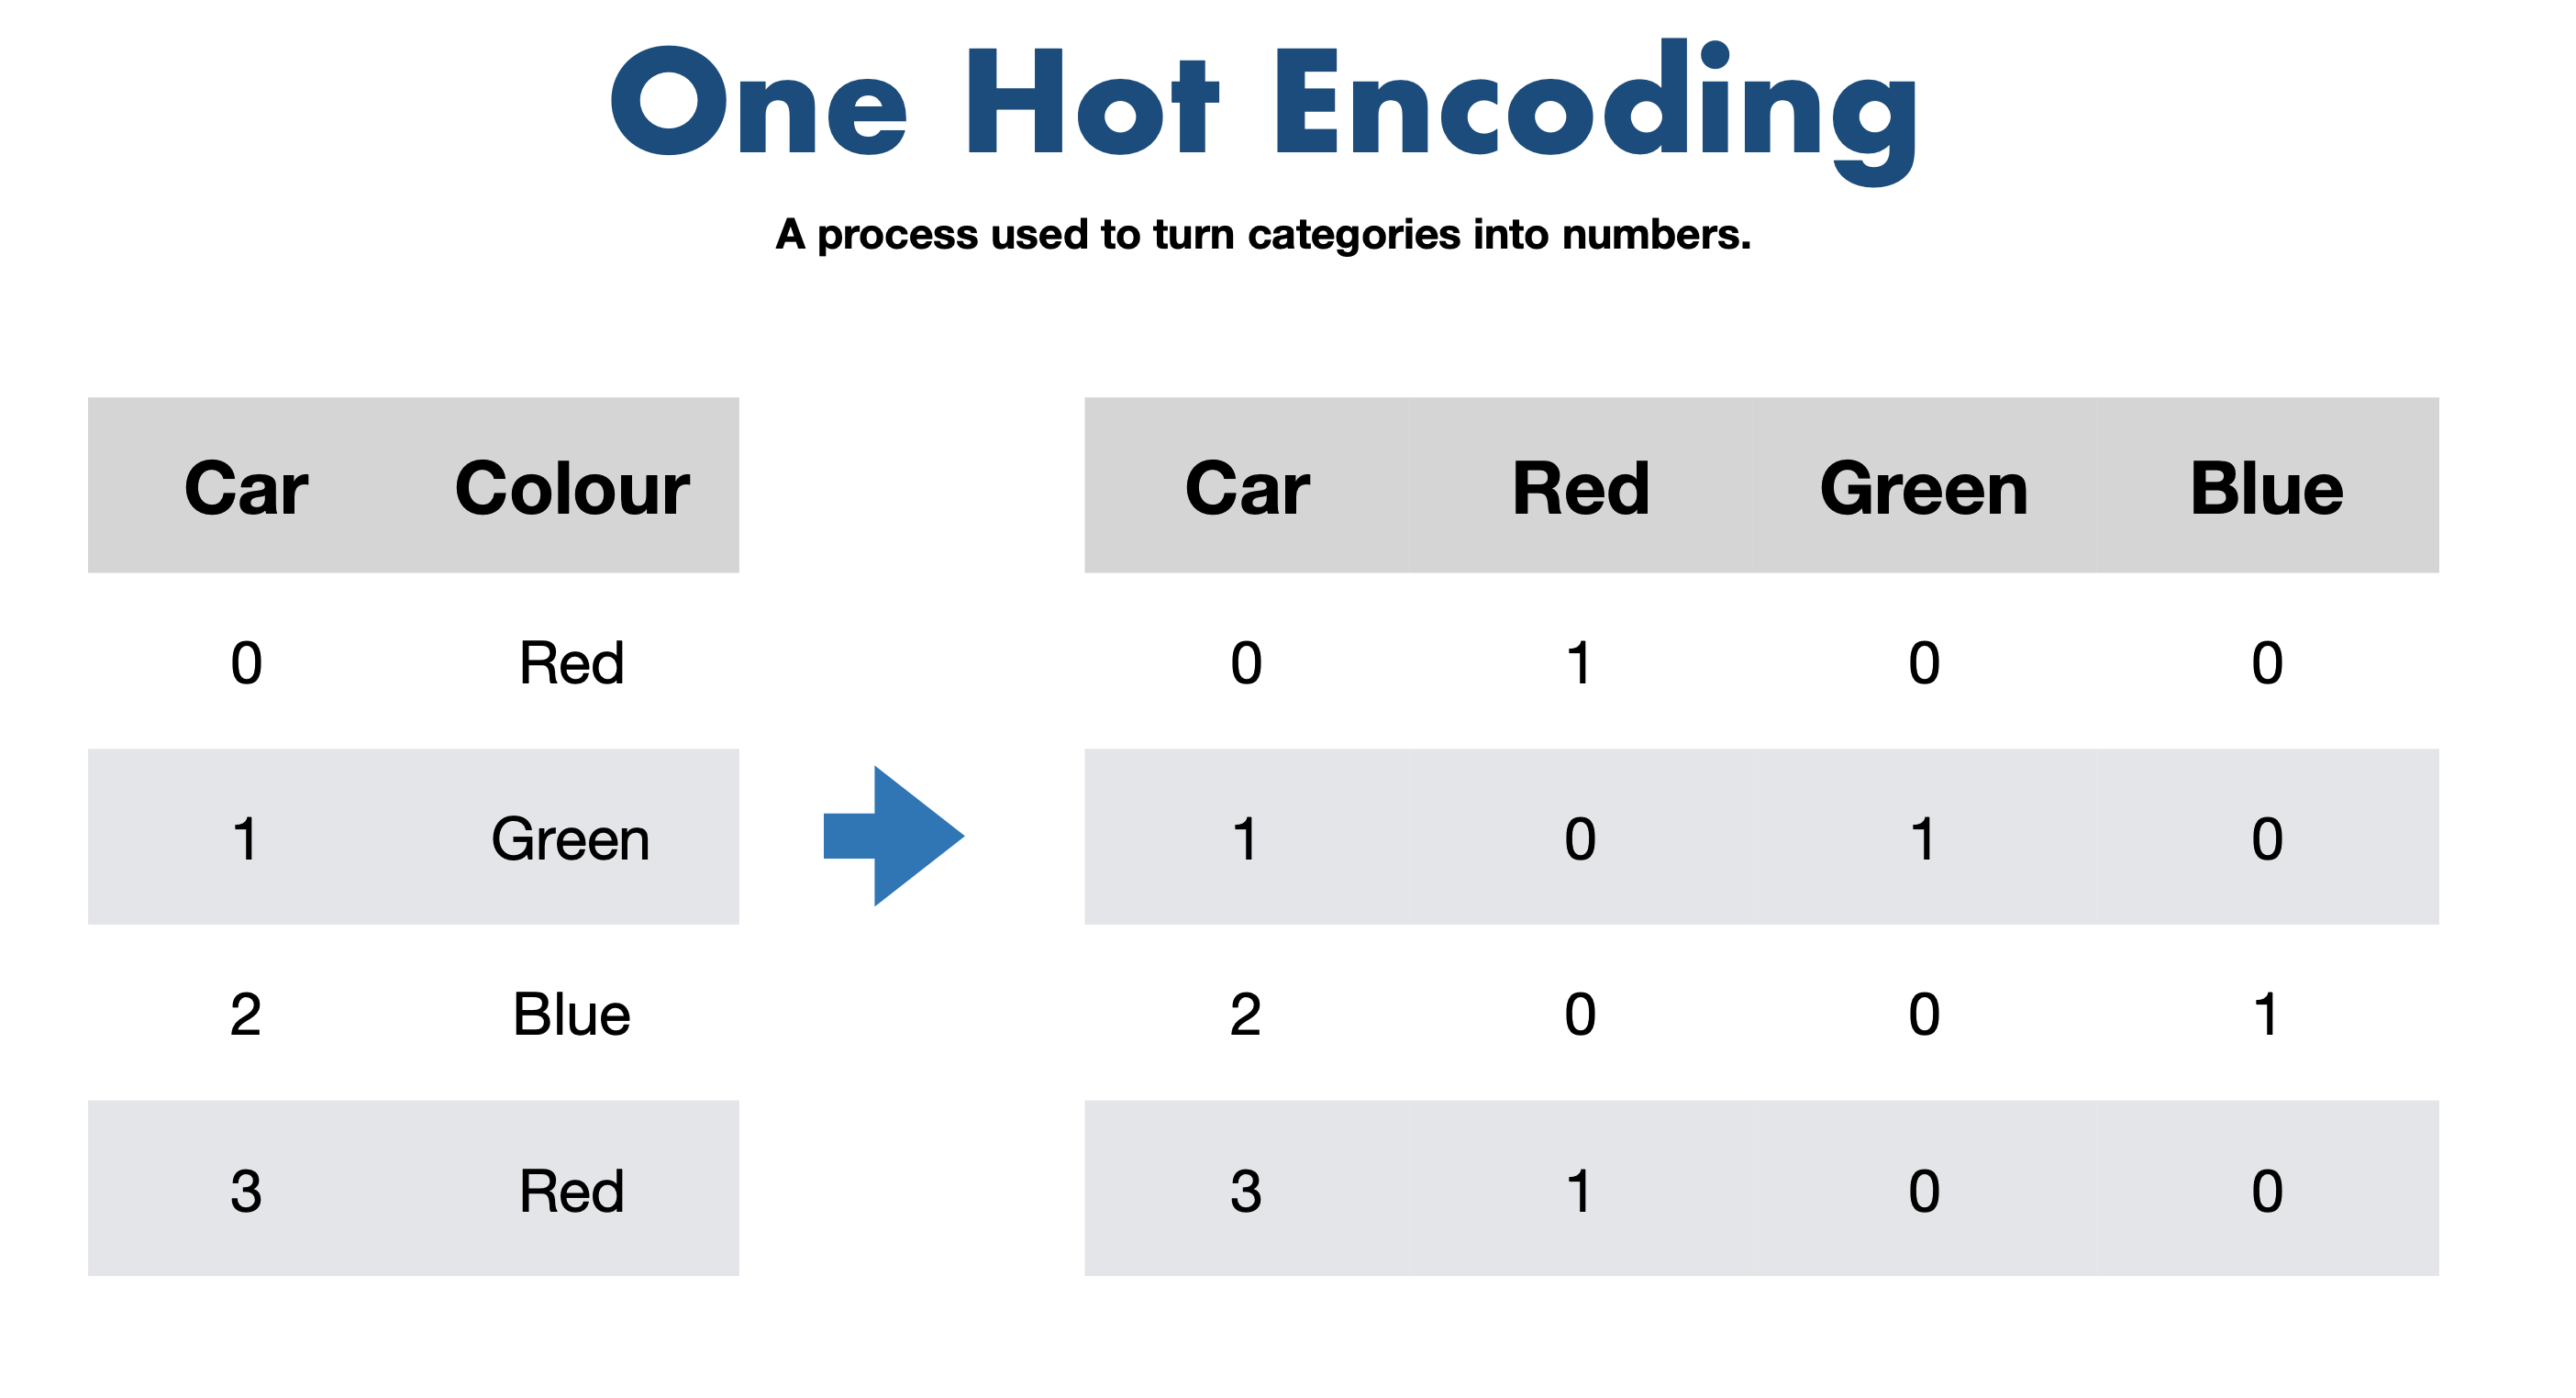

****
<br><br>
### Another way... using pandas and `pd.get_dummies()`
<br><br>

In [42]:
# Another way... using pandas and pd.get_dummies()

car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [43]:
dummies = pd.get_dummies(car_sales[["Make", "Colour", "Doors"]])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


<br><br>Have to convert _Doors_ to `object`, for `dummies` to work on it...<br><br>

In [44]:
# Have to convert Doors to object for dummies to work on it...

car_sales["Doors"] = car_sales["Doors"].astype(object)
dummies = pd.get_dummies(car_sales[["Make", "Colour", "Doors"]])
dummies

,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White,Doors_3,Doors_4,Doors_5
0,0,1,0,0,0,0,0,0,1,0,1,0
1,1,0,0,0,0,1,0,0,0,0,0,1
2,0,1,0,0,0,0,0,0,1,0,1,0
3,0,0,0,1,0,0,0,0,1,0,1,0
4,0,0,1,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,1,1,0,0,0,0,0,1,0
996,0,0,1,0,0,0,0,0,1,1,0,0
997,0,0,1,0,0,1,0,0,0,0,1,0
998,0,1,0,0,0,0,0,0,1,0,1,0


In [45]:
# The categorical categories are now either 1 or 0...

X["Make"].value_counts()

Toyota    398
Honda     304
Nissan    198
BMW       100
Name: Make, dtype: int64

****
**Let's refit the model**

In [46]:
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(transformed_X,
                                                    y,
                                                    test_size=0.2)
# splitting the dataset.
# This dataset here is "transformed_X" which is newly constructed from "X",
# by converting categorical values into numerical values.

model.fit(X_train, y_train)                                                 # fitting the dataset over the model

RandomForestRegressor()

In [47]:
# calculating the score of test data

model.score(X_test, y_test)

/Users/barmanr/.pyenv/versions/3.7.8/lib/python3.7/site-packages/sklearn/base.py:442: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"


0.3235867221569877

<br><br>
### 1.2 What if there were missing values?
Many machine learning models don't work well when there are missing values in the data.

There are 2 main options when dealing with missing values :

- **Fill them with some given value**.
For example, generally, you might fill missing values of a numerical column with the **mean of all the other values in that same column**. The practice of filling missing values is often referred to as **Imputation**.

- **Remove them**.
If a row has missing values, you may opt to remove them completely from your sample completely. However, this potentially results in using less data to build your model.

> **Note :** Dealing with missing values is a problematic issue. And there's often **no best way** to do it.

Let's understand this with example of `car-sales-extended-missing-data.csv` dataset which has missing values in it.

In [205]:
# Import car sales dataframe with missing values

car_sales_missing = pd.read_csv("datasets/car-sales-extended-missing-data.csv")
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [206]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

> `.isna().sum()` will return the number of rows (under each column) which have `NaN` values.

<br><br>

In [207]:
from sklearn.model_selection import train_test_split

X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 4), (200, 4), (800,), (200,))

In [208]:
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [209]:
X

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431.0,4.0
1,BMW,Blue,192714.0,5.0
2,Honda,White,84714.0,4.0
3,Toyota,White,154365.0,4.0
4,Nissan,Blue,181577.0,3.0
...,...,...,...,...
995,Toyota,Black,35820.0,4.0
996,NaN,White,155144.0,3.0
997,Nissan,Blue,66604.0,4.0
998,Honda,White,215883.0,4.0


In [213]:
# Let's convert the categorical columns to one-hot-encoded (code copied from above)
# Turn the categories (Make, Door & Colour) into numbers

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]

one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", 
                                 one_hot, 
                                 categorical_features)],
                                 remainder="passthrough")

transformed_X = transformer.fit_transform(X)


In [215]:
print(type(transformed_X))

transformed_X

<class 'scipy.sparse.csr.csr_matrix'>


<1000x16 sparse matrix of type '<class 'numpy.float64'>'
	with 4000 stored elements in Compressed Sparse Row format>

In [212]:
# this scipy-sparse matrix is probably large to visualize properly as an array, so that's why it doesn't display on notebook
# firstly, convert it into an array and then into a dataframe.

pd.DataFrame(transformed_X.toarray())

<class 'scipy.sparse.csr.csr_matrix'>


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,35820.0
996,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,215883.0


<br>So, this does not work. That means, we'll either have to fill or remove missing values.

### 1.2.1 Fill missing data with pandas
What we'll do is fill the rows with "missing" where categorical values are absent, the numerical features with their mean value and with number `4` for the Doors column; and drop the rows where the "Price" is missing.

> We could fill Price with the mean, however, since it's the target variable, we don't want to be introducing too many fake labels.

> **Note :** The practice of filling missing data is called **Imputation**. And it's important to remember there's no perfect way to fill missing data. The methods we're using are only one of many. The techniques you use will depend heavily on your dataset. A good place to look would be searching on web for "data imputation techniques".

In [216]:
# Fill the "Make" column

car_sales_missing["Make"].fillna("missing", inplace=True)       # fill missing values with string "missing"

In [217]:
# Fill the "Colour" column

car_sales_missing["Colour"].fillna("missing", inplace=True)    # fill missing values with string "missing"

In [218]:
# Fill the "Odometer (KM)" column

car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(), inplace=True)

# fill missing values with the mean-value

In [219]:
# Fill the "Doors" column

car_sales_missing["Doors"].fillna(4, inplace=True)

# fill missing values with integer 4 - because most cars in the dataset have doors=4

<br><br>
Now all the missing vlaues in the feature columns are filled in with certain value.

And the dataframe's "Price" column only has missing (or, NA) values.
<br><br>

In [220]:

car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [221]:
# Remove rows with missing Price labels

car_sales_missing.dropna(inplace=True)

In [222]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

<br>We've removed the rows with missing "Price" values, now there's less data but there's no more missing values.

In whole, we have removed 50 rows that had missing vlaues pertaining to "Price" column.

In [223]:
len(car_sales_missing)

950

In [224]:
# split

X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

((760, 4), (190, 4), (760,), (190,))

In [226]:
# Now let's one-hot encode the categorical columns (copied from above)

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]

one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", 
                                 one_hot, 
                                 categorical_features)],
                                 remainder="passthrough")

transformed_X = transformer.fit_transform(X)
transformed_X

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [228]:
pd.DataFrame(transformed_X.toarray())

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
946,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,155144.0
947,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
948,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,215883.0


<br><br>
### 1.2.2 Filling missing data and transforming categorical data with Scikit-Learn

Scikit-learn provides another method called `SimpleImputer()` which allows us to do a similar thing.

**`SimpleImputer()` transforms data by filling missing values with a given strategy.**

And we can use it to fill the missing values in our DataFrame as above.

In [267]:
# Reimport the DataFrame
car_sales_missing = pd.read_csv("./datasets/car-sales-extended-missing-data.csv")
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [268]:
# Drop the rows which have no values in their "Price" column

car_sales_missing.dropna(subset=["Price"], inplace=True)

In [269]:
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [270]:
# Split into X and y
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]


# Split data into train and test
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((760, 4), (190, 4), (760,), (190,))

> **Note :** We split data into train & test to perform filling missing values on them separately.

In [271]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [272]:
# Fill :
# • categorical_features -> 'missing',
# • door_feature -> 4,
# • numerical_feature -> mean

cat_imputer = SimpleImputer(strategy="constant", fill_value="missing")

door_imputer = SimpleImputer(strategy="constant", fill_value=4)

num_imputer = SimpleImputer(strategy="mean")

In [273]:
# Define different column features

categorical_features = ["Make", "Colour"]

door_feature = ["Doors"]

numerical_feature = ["Odometer (KM)"]

> **Note :** We use `fit_transform()` on the training data and `transform()` on the testing data. In essence, we learn the patterns in the training set and transform it via imputation (fit, then transform). Then we take those same patterns and fill the test set (transform only).

In [274]:
# Create an imputer

imputer = ColumnTransformer([
                            ("cat_imputer", cat_imputer, categorical_features),     # "cat_imputer" - 1st parameter is just a denotion/name of the imputer
                                                                                    # cat_imputer   - 2nd parameter is the imputer that applies on 3rd param i.e. categorical_features
                            ("door_imputer", door_imputer, door_feature),
                            ("num_imputer", num_imputer, numerical_feature)])


# Fill train and test values separately
filled_X_train = imputer.fit_transform(X_train)
filled_X_test = imputer.transform(X_test)


# Check filled X_train
filled_X_train

array([['Honda', 'White', 4.0, 71934.0],
       ['Toyota', 'Red', 4.0, 162665.0],
       ['Honda', 'White', 4.0, 42844.0],
       ...,
       ['Toyota', 'White', 4.0, 196225.0],
       ['Honda', 'Blue', 4.0, 133117.0],
       ['Honda', 'missing', 4.0, 150582.0]], dtype=object)

In [283]:
# check filled_X_test

filled_X_test

array([['Toyota', 'Blue', 4.0, 99761.0],
       ['Toyota', 'Black', 4.0, 17975.0],
       ['Honda', 'Blue', 4.0, 197664.0],
       ['Nissan', 'Green', 4.0, 235589.0],
       ['Honda', 'Black', 4.0, 231659.0],
       ['Toyota', 'Blue', 4.0, 247601.0],
       ['Toyota', 'Green', 4.0, 110078.0],
       ['missing', 'White', 4.0, 155383.0],
       ['Nissan', 'White', 4.0, 26634.0],
       ['Honda', 'White', 4.0, 130319.03314917127],
       ['Honda', 'Green', 4.0, 238825.0],
       ['Honda', 'Green', 4.0, 37606.0],
       ['Toyota', 'Blue', 4.0, 230908.0],
       ['Toyota', 'Red', 4.0, 159925.0],
       ['Toyota', 'Blue', 4.0, 181466.0],
       ['Toyota', 'Blue', 4.0, 140465.0],
       ['Toyota', 'White', 4.0, 146307.0],
       ['Toyota', 'Green', 4.0, 214179.0],
       ['Honda', 'White', 4.0, 184869.0],
       ['Toyota', 'Black', 4.0, 224986.0],
       ['Nissan', 'White', 3.0, 176135.0],
       ['Nissan', 'Red', 4.0, 130319.03314917127],
       ['Toyota', 'Blue', 4.0, 112223.0],
       ['BM

In [280]:
# Get our transformed data arrays back into DataFrames

car_sales_filled_train = pd.DataFrame(filled_X_train, 
                                      columns=["Make", "Colour", "Doors", "Odometer (KM)"])


car_sales_filled_test = pd.DataFrame(filled_X_test, 
                                      columns=["Make", "Colour", "Doors", "Odometer (KM)"])


In [281]:
# Check missing data in training set
car_sales_filled_train.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [282]:
# Check missing data in test set
car_sales_filled_test.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [286]:
# Check to see the original... still missing values

car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [284]:
len(car_sales_missing)

950

In [263]:
# Now let's One-Hot-Encode the features into numeric data, with the same code as before

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", 
                                 one_hot, 
                                 categorical_features)],
                                 remainder="passthrough")

# Fill train and test values separately
transformed_X_train = transformer.fit_transform(car_sales_filled_train)
transformed_X_test = transformer.transform(car_sales_filled_test)

# Check transformed and filled X_train
transformed_X_train.toarray()

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 7.19340e+04],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.62665e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 4.28440e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.96225e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.33117e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.50582e+05]])

In [264]:
# Now we've transformed X, let's fit a model by using RandomForestRegressor
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

# Make sure to use transformed (filled and one-hot encoded X data)
model.fit(transformed_X_train, y_train)
model.score(transformed_X_test, y_test)

0.21229043336119102

> So, 🛑 POINTS TO REMEMBER 🛑 :<br><br>
• Most datasets you come across won't be in a form ready to immediately start using them with machine learning 
models.<br>And some may take more preparation than others to get ready to use.<br><br>
• For most machine learning models, your data has to be numerical. This will involve converting whatever you're working with into numbers. This process is often referred to as feature engineering or feature encoding.<br><br>
• Some machine learning models aren't compatible with missing data. The process of filling missing data is referred to as data imputation.

****

<br><br>
## 2. Choosing the right estimator/algorithm for your problem

Once you've got your data ready, the next step is to choose an appropriate machine learning algorithm or model to find patterns in your data.

Some things to note :

* Sklearn (scikit-learn) refers to any machine learning model or algorithms as estimators.


* Classification problem - predicting a category (heart disease or not).


* Sometimes you'll see `clf` (short for classifier) used as a classification estimator instance's variable name.


* Regression problem - predicting a number (selling price of a car).


* Unsupervised problem - clustering (grouping unlabelled samples with other similar unlabelled samples).


If you know what kind of problem you're working with, one of the next places you should look at is the [Scikit-Learn algorithm cheatsheet](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html).

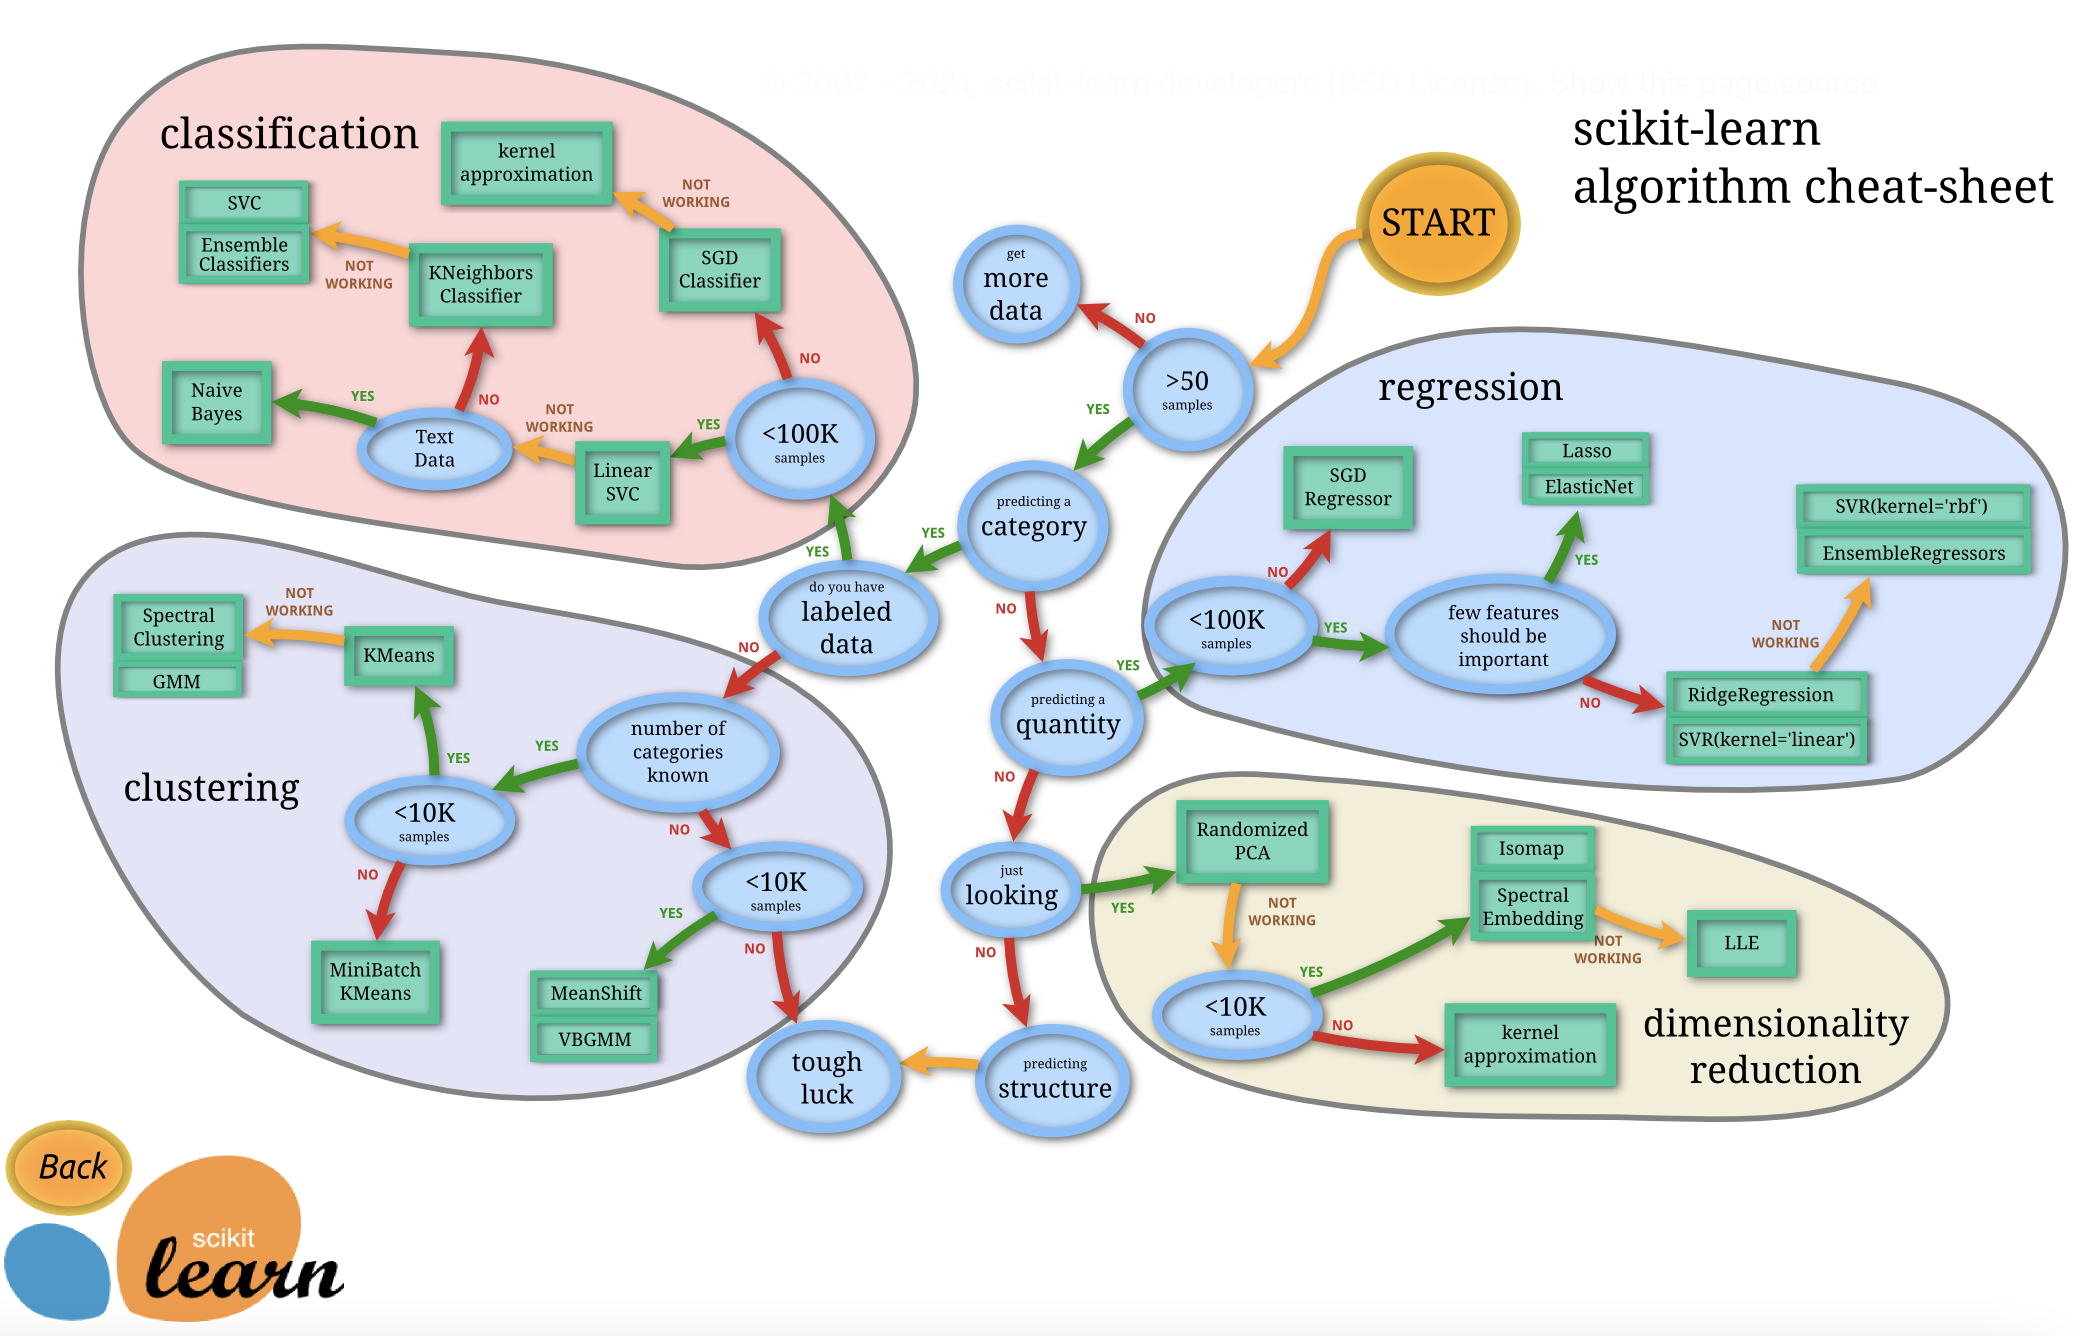<br><br>

This cheatsheet gives you a bit of an insight into the algorithm you might want to use for the problem you're working on.

It's important to remember, you don't have to explicitly know what each algorithm is doing on the inside to start using them. If you do start to apply different algorithms but they don't seem to be working, that's when you'd start to look deeper into each one.

## 2.1 Picking a machine learning model for a Regression problem

In [59]:
# Get California Housing dataset

from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

housing # gets fetched as dictionary

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

<br><br>Since it's in a dictionary, let's turn it into a DataFrame so we can inspect it better.

Take a look about California Housing dataset -> https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset
<br><br>

In [60]:
housing_df = pd.DataFrame(housing["data"], columns=housing["feature_names"])

housing_df["target"] = pd.Series(housing["target"])

housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [61]:
len(housing_df)

20640

Here, we can use the feature columns, such as :

- MedInc - median income in block group
- HouseAge - median house age in block group
- AveRooms - average number of rooms per household
- AveBedrms - average number of bedrooms per household

To predict the target column which expresses the median house value for specfici California districts in hundreds of thousands of dollars ($100,000).

In essence, each row is a different district in California (the data) and we're trying to build a model to predict the median house value in that district (the target/label) given a series of attributes about the houses in that district.

Since we have data and labels, this is a supervised learning problem. And since we're trying to predict a number, it's a regression problem.

Following the map through, knowing what we know, it suggests we try [RidgeRegression](https://scikit-learn.org/stable/modules/linear_model.html#ridge-regression). Let's chek it out :
<br><br>

In [290]:
# Import the Ridge model class from the linear_model module
from sklearn.linear_model import Ridge

# Setup random seed
np.random.seed(42)


# Create the data
X = housing_df.drop("target", axis=1)
y = housing_df["target"]


# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


# Instantiate and fit the model (on the training set)
model = Ridge()
model.fit(X_train, y_train)


# Check the score of the model (on the test set)
# The default score metirc of regression aglorithms is R²
model.score(X_test, y_test)

0.5758549611440126

> The default score metric of Regression aglorithms is R2 (R-squared).

<br><br>

What if `RidgeRegression` didn't work? Or what if we want to improve our results?...

Following the diagram, the next step would be to try `EnsembleRegressors` (https://scikit-learn.org/stable/modules/ensemble.html).
> **Ensemble** is another word for multiple models put all together to make a decision.

One of the most common and useful ensemble methods is the **[Random Forest](https://scikit-learn.org/stable/modules/ensemble.html#forest)**. Known for its fast training and prediction times and adaptibility to different problems.

The basic premise of the Random Forest is to combine a number of different decision trees, each one random from the other and make a prediction on a sample by averaging the result of each decision tree.

Since we're working with regression, we'll use Scikit-Learn's `RandomForestRegressor` (https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html).

We can use the exact same workflow as above, except for changing the model.

In [291]:
# Import the RandomForestRegressor model class from the ensemble module
from sklearn.ensemble import RandomForestRegressor


# Setup random seed
np.random.seed(42)


# Create the data
X = housing_df.drop("target", axis=1)
y = housing_df["target"]


# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


# Instaniate and fit the model (on the training set)
model = RandomForestRegressor()
model.fit(X_train, y_train)


# Check the score of the model (on the test set)
### (The default score metric of regression aglorithms is R²)
model.score(X_test, y_test)

0.8066196804802649

### 2.2 Picking a machine learning model for a Classification problem
Now, let's check out the choosing process for a classification problem.

Say you were trying to predict whether or not a patient has heart disease based on their medical records.

The dataset in `./dataset/heart-disease.csv` contains data for just that problem.

In [2]:
heart_disease = pd.read_csv("./datasets/heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


<br><br>
Similar to the California Housing dataset, here we want to use all of the available data to predict the target column (1 for if a patient has heart disease and 0 for if they don't).

And....

We've got 303 samples (1 row = 1 sample) and we're trying to predict whether or not a patient has heart disease.

Because we're trying to predict whether each sample is one thing or another, we've got a classification problem.

Let's see how it lined up with Scikit-Learn algorithm cheat-sheet :

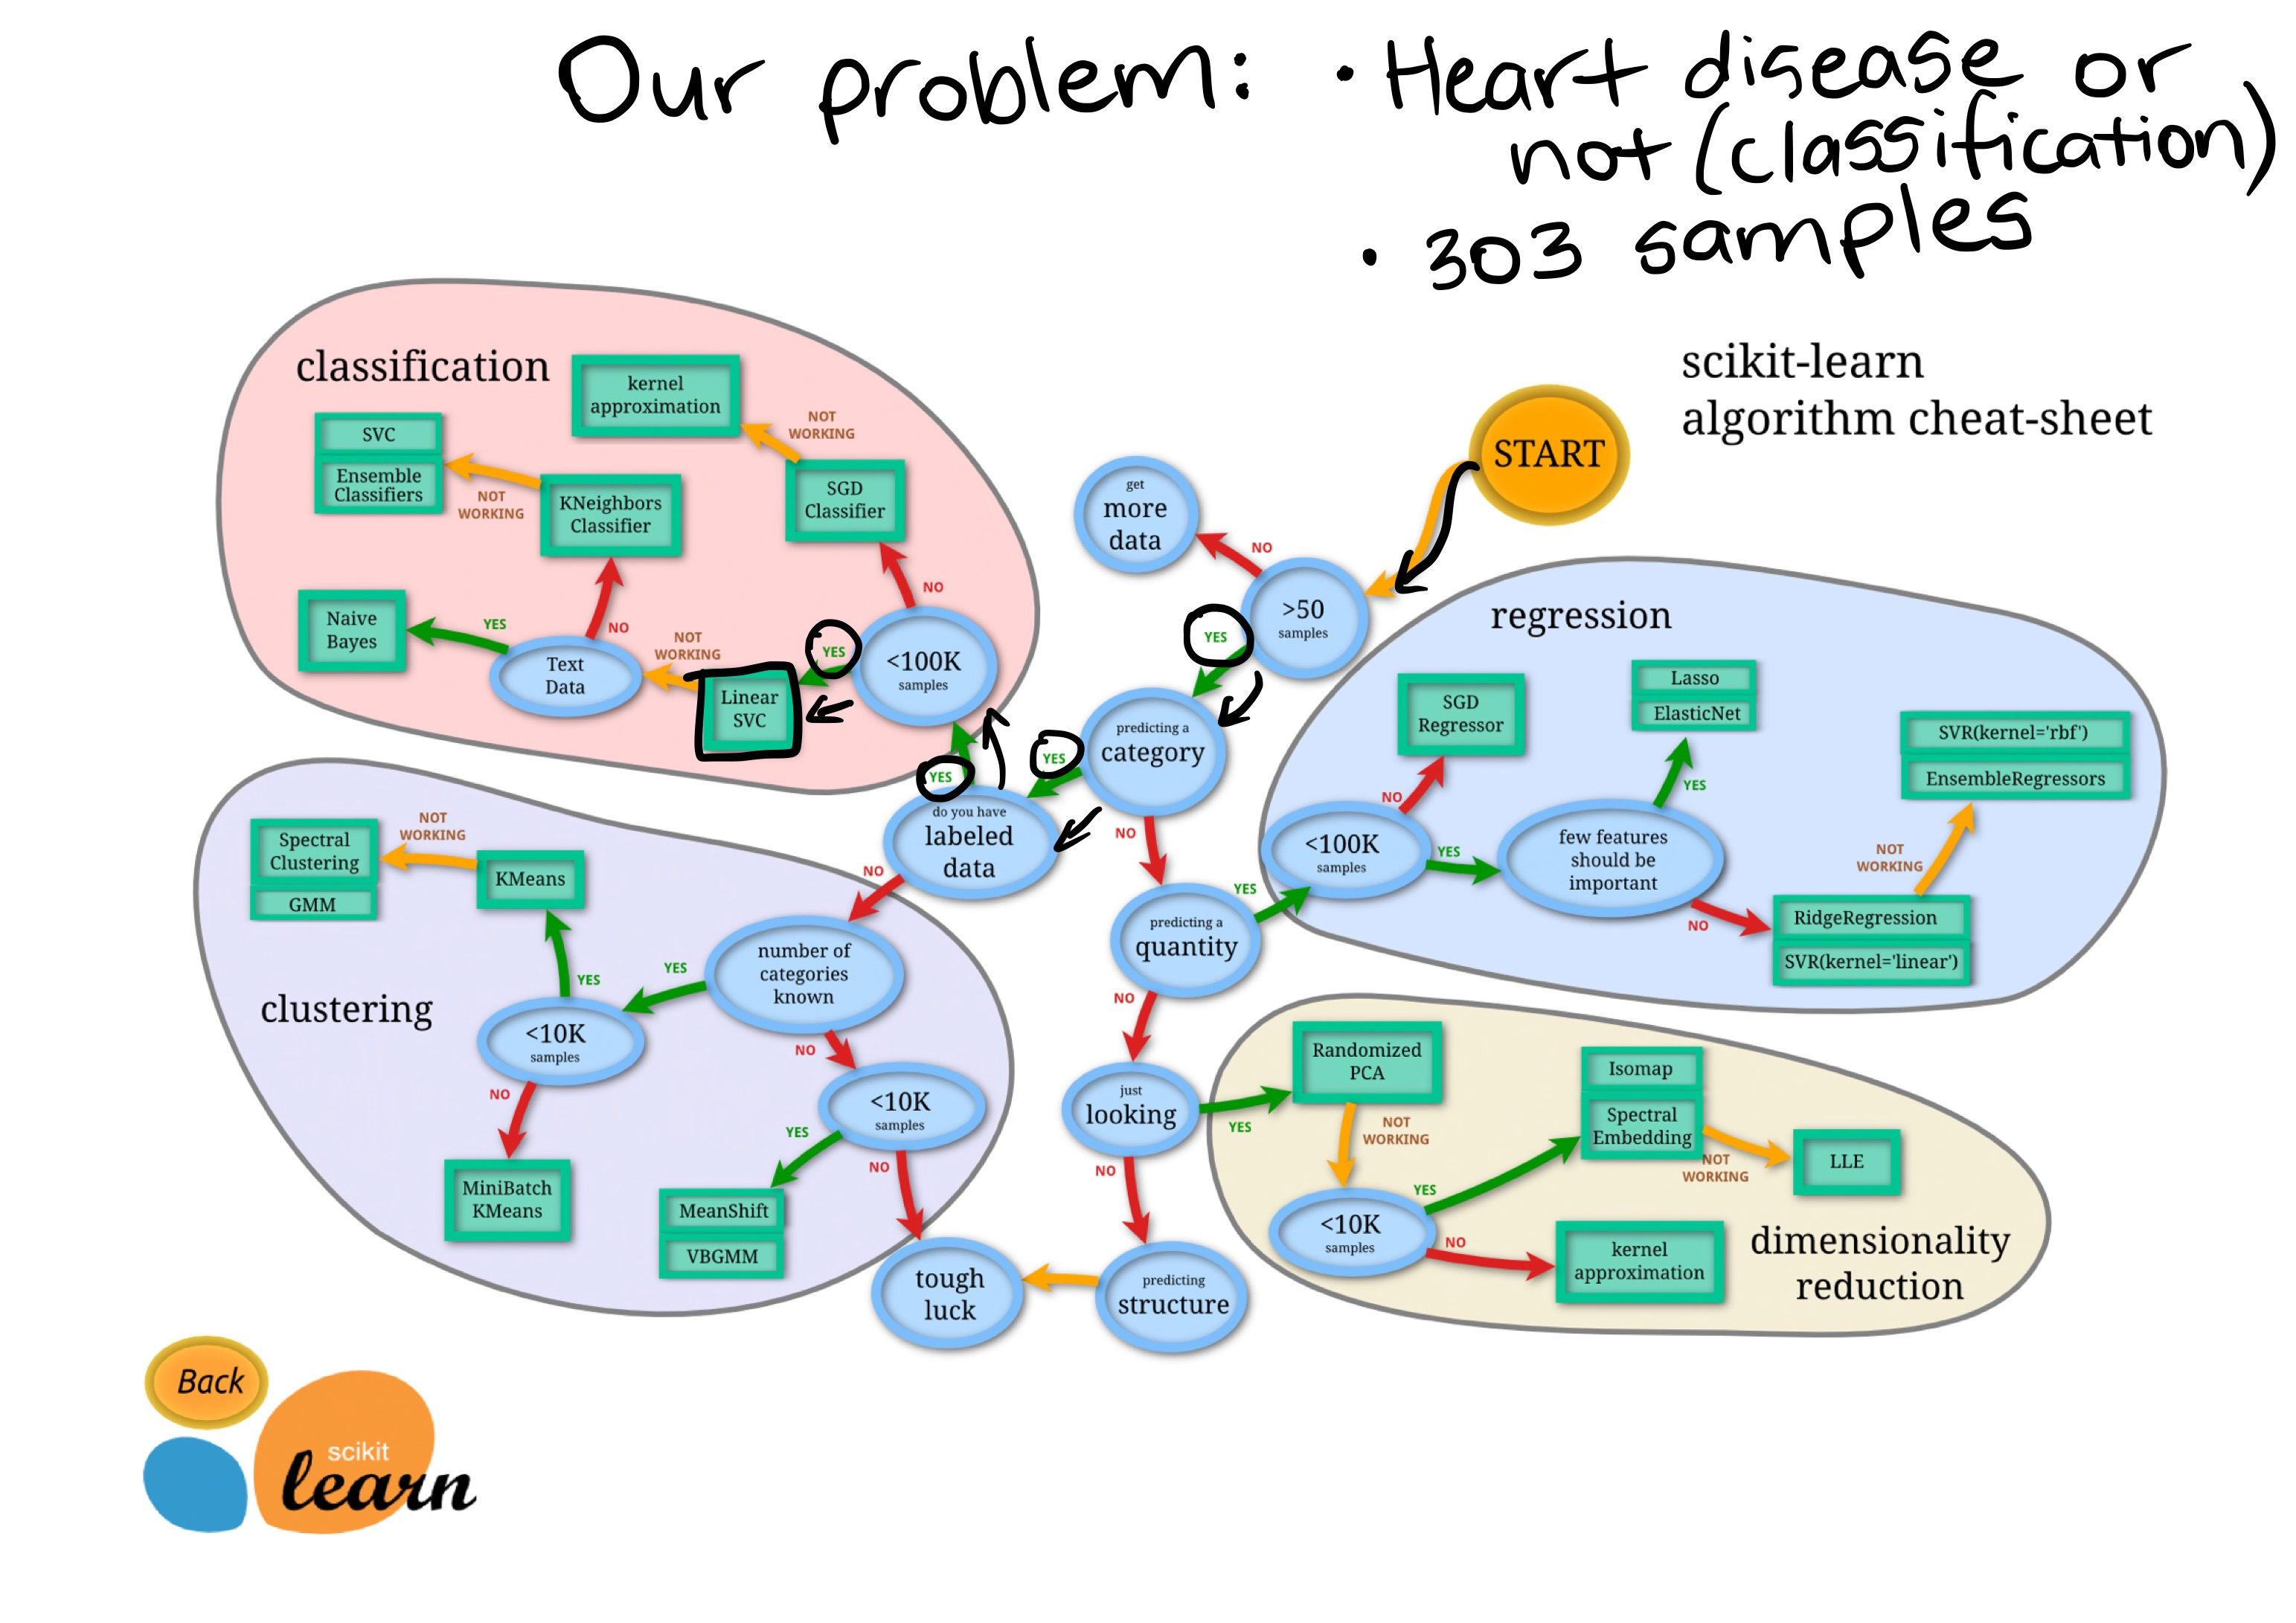

<br><br>
Following the cheat-sheet we end up at `LinearSVC` which stands for [Linear Support Vector Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC). Let's try it on our data.
<br><br>

In [312]:
# Import LinearSVC from the svm module
from sklearn.svm import LinearSVC

# Setup random seed
np.random.seed(42)


# Split the data into X (features/data) and y (target/labels)
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]


# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


# Instantiate and fit the model (on the training set)
clf = LinearSVC(max_iter=1000)
clf.fit(X_train, y_train)


# Check the score of the model (on the test set)
clf.score(X_test, y_test)

/Users/barmanr/.pyenv/versions/3.7.8/lib/python3.7/site-packages/sklearn/svm/_base.py:1201: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


0.8688524590163934

In [299]:
heart_disease['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

<br><br>
Let's try to use [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) on the same heart-disease dataset :
<br><br>

In [5]:
# Import LinearSVC from the svm module
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)


# Split the data into X (features/data) and y (target/labels)
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]


# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


# Instantiate and fit the model (on the training set)
rm_clf = RandomForestClassifier()
rm_clf.fit(X_train, y_train)


# Check the score of the model (on the test set)
rm_clf.score(X_test, y_test)

0.8524590163934426

<br>Seems like `LinearSVC`, (for a `max_iter=1000`) produces better observation than `RandomForestClassifier` on Heart-Disease Classification problem.<br><br><br>

<br>
________________________________________________________________________________________________________________________________________

#### ✅ A little tidbit for modelling in machine learning is :

> If you have structured data (tables or dataframes), use ensemble methods, such as, a Random Forest.

> If you have unstructured data (text, images, audio, things not in tables), use deep learning or transfer learning.

(For this notebook, we're focused on structured data, which is why the Random Forest has been our model of choice.)

**If you'd like to learn more about the Random Forest and why it's the war horse of machine learning, check out these resources :**

- [Random Forests in Python by yhat](http://blog.yhat.com/posts/random-forests-in-python.html)
- [An Implementation and Explanation of the Random Forest in Python by Will Koehrsen](https://towardsdatascience.com/an-implementation-and-explanation-of-the-random-forest-in-python-77bf308a9b76)_.

<br>
________________________________________________________________________________________________________________________________________

## 3. Fit the model to data and using it to make predictions

Now you've chosen a model, the next step is to have it learn from the data so it can be used for predictions in the future.

## 3.1 Fitting a model to data

In Scikit-Learn, the process of having a machine learning model learn patterns from a dataset involves calling the `.fit()` method and passing it data, such as, `fit(X, y)`; where `X` is a feature array and `y` is a target array.

_Other names for `X` include :_

* Data
* Feature variables
* Features

_Other names for `y` include :_

* Labels
* Target variable

For supervised learning there is usually an `X` and `y`. For unsupervised learning, there's no `y` (no labels).

Passing `X` and `y` to `fit()` will cause the model to go through all of the examples in `X` (i.e. data) and see what their corresponding `y` (i.e. label) is.

> How the model does this is different for different models that you come across.

Analogically you can imagine this process similar to the way that, how you would figure out patterns if you had enough time ?...<br>You'd look at the feature variables, `X`, the `age`, `sex`, `chol (cholesterol)` and see what different values led to the labels, `y`, 1 for heart-disease, 0 for not-heart-disease.

This concept, regardless of the problem, is similar throughout all of machine learning.

**During training (finding patterns in data) :**

A machine learning algorithm looks at a dataset, finds patterns, tries to use those patterns to predict something and corrects itself as best it can with the available data and labels. It stores these patterns for later use.

**During testing or in production (using learned patterns) :**

A machine learning algorithm uses the patterns it's previously learned in a dataset to make a prediction on some unseen data.

## 3.2 Making predictions using a machine learning model
When you've got a trained model, one which has hopefully learned patterns in the data, you'll proceed to use it to make predictions.

Scikit-Learn enables to make predications in several ways. 2 of the most common and useful are :
* `predict()`
* `predict_proba()`

**Example :** Let's use the trained model `rm_clf` (random-forest-classifier model of Heart Disease dataset) to make predictions :

**1. `.predict()` :**

In [330]:
rm_clf.predict(X_test[:5])         # taking only first 5 samples of X_test dataframe

array([0, 1, 1, 0, 1])

It's standard practice to save these predictions to a variable named something like `y_preds` for later comparison to `y_test` or `y_true`.<br><br>

In [323]:
# Compare predictions to truth

y_preds = clf.predict(X_test)

np.mean(y_preds == y_test)

0.8688524590163934

<br><br>
**2. scikit-learn's [`accuracy_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) :**
<br><br>

In [324]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_preds)

0.8688524590163934

<br><br>
**3. `.score()` :**
<br><br>

In [356]:
rm_clf.score(X_test, y_test)

0.8524590163934426

> **Note :** For the `predict()` function to work, it must be passed `X` (i.e. data) in the same format the model was trained on.<br>**Anything different and it will return an error.**

> `predict_proba()` returns the probabilities of a sample w.r.t a classification label.

In [331]:
# Return probabilities rather than labels

rm_clf.predict_proba(X_test[:5])                # rm_clf pertains to Heart Disease dataset.
                                                # taking only first 5 samples of X_test dataframe

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

> `predict_proba()` returns an array of arrays, each containing 2 values.

> Each number in the arrays is the probability of that label being true / false, given in sample.

In [333]:
rm_clf.predict_proba(X_test[:1])

array([[0.89, 0.11]])

This output means, for the sample `X_test[:1]` the model (`rm_clf`) is predicting a label `0` (i.e. "No Heart Disease") with a probability score of 0.89

Because the score is over 0.5, when using `predict()`, a label of `0` is returned.

> **Note :** Because our problem is a Binary Classification task (i.e. heart disease or not heart disease), predicting a label with 0.5 probability every time would be the same as a coin-toss (guessing).<br>Therefore, once the prediction probability of a sample surpasses 0.5, for a certain label, it's assigned that label.

### `predict()` can also be used for Regression models :

In [359]:
# Import the RandomForestRegressor model class from the ensemble module
from sklearn.ensemble import RandomForestRegressor


# Setup random seed
np.random.seed(42)


# Create the data
X = housing_df.drop("target", axis=1)
y = housing_df["target"]


# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


# Instantitate and fit the model (on the training set)
model = RandomForestRegressor()
model.fit(X_train, y_train)


# Make predictions
y_preds = model.predict(X_test)

In [360]:
y_preds[:10]

# this is "Observed value"

array([0.49384  , 0.75494  , 4.9285964, 2.54029  , 2.33176  , 1.6549701,
       2.34323  , 1.66182  , 2.47489  , 4.8344779])

In [353]:
np.array(y_test[:10])

# this is "True value"

array([0.477  , 0.458  , 5.00001, 2.186  , 2.78   , 1.587  , 1.982  ,
       1.575  , 3.4    , 4.466  ])

In [343]:
# Compare the predictions to the truth
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(y_test, y_preds))               # Mean Absolute Error

0.3265721842781009


> This Mean-Absolute error of `0.3266` means that any **observed value** may be away from its corresponding **true value** by a factor of `0.3266`.

<br><br>

_______________________________________________________________________________________________________________________________________

## 4. Evaluating a model
After training a model, you'll want a way to measure how trustworthy its predictions are.

> Refer scikit-learn documentation => [Metrics and scoring: quantifying the quality of predictions](https://scikit-learn.org/stable/modules/model_evaluation.html)

The Scikit-Learn implements 3 different methods of evaluating models :

1. **`score()` method**

2. **`scoring` parameter** - This parameter can be passed to methods such as `cross_val_score()` or `GridSearchCV()` to tell Scikit-Learn to use a specific type of scoring metric.

3. **Problem-specific metric functions**. Similar to how the scoring parameter can be passed different scoring functions, Scikit-Learn implements these as stand alone functions.

The scoring function you use will also depend on the problem you're working on.

Classification problems have different evaluation metrics and scoring functions to regression problems.

## 4.1 General model evaluation with `score()`

We can understand the application of `score()` method with the Heart Disease classification model and California Housing regression model.

In [358]:
rm_clf.score(X_test, y_test)

# X_test and y_test pertain to heart_disease dataframe of the Heart Disease dataset

0.8524590163934426

In [362]:
model.score(X_test, y_test)

# X_test and y_test pertain to housing_df dataframe of the California Housing dataset

0.8066196804802649

> **Note 1 :** `model` is an instance of `RandomForestRegressor`. And since it's a regression model, the default metric built into `score()` is the **coefficient of determination or R².**

> **Note 2 :** `rm_clf` is an instance of `RandomForestClassifier`, here `score()` method returns the **mean accuracy.**

<br><br>

## 4.2 Evaluating models by using the `scoring` parameter
We can also use a custom scoring parameter with `cross_val_score()` or `GridSearchCV`.

> As you may have guessed, the scoring parameter that you set will be different depending on the problem you're working on.


In [6]:
# X_test and y_test pertain to heart_disease dataframe of the Heart Disease dataset

# Using score()
rm_clf.score(X_test, y_test)

0.8524590163934426

In [9]:
from sklearn.model_selection import cross_val_score

# Using cross_val_score()
cross_val_score(rm_clf, X, y)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

<br><br>
* `cross_val_score()` returns an array &nbsp; | &nbsp; `score()` only returns a single number.

* `cross_val_score()` returns an array because of a parameter called **cv (i.e. Cross-Validation)**.

When **cv** is not set, `cross_val_score()` will return an array of 3 numbers by default (or 5 by default if you're using Scikit-Learn version 0.22+).

<br>

**See below image to understand about Cross Validation :**

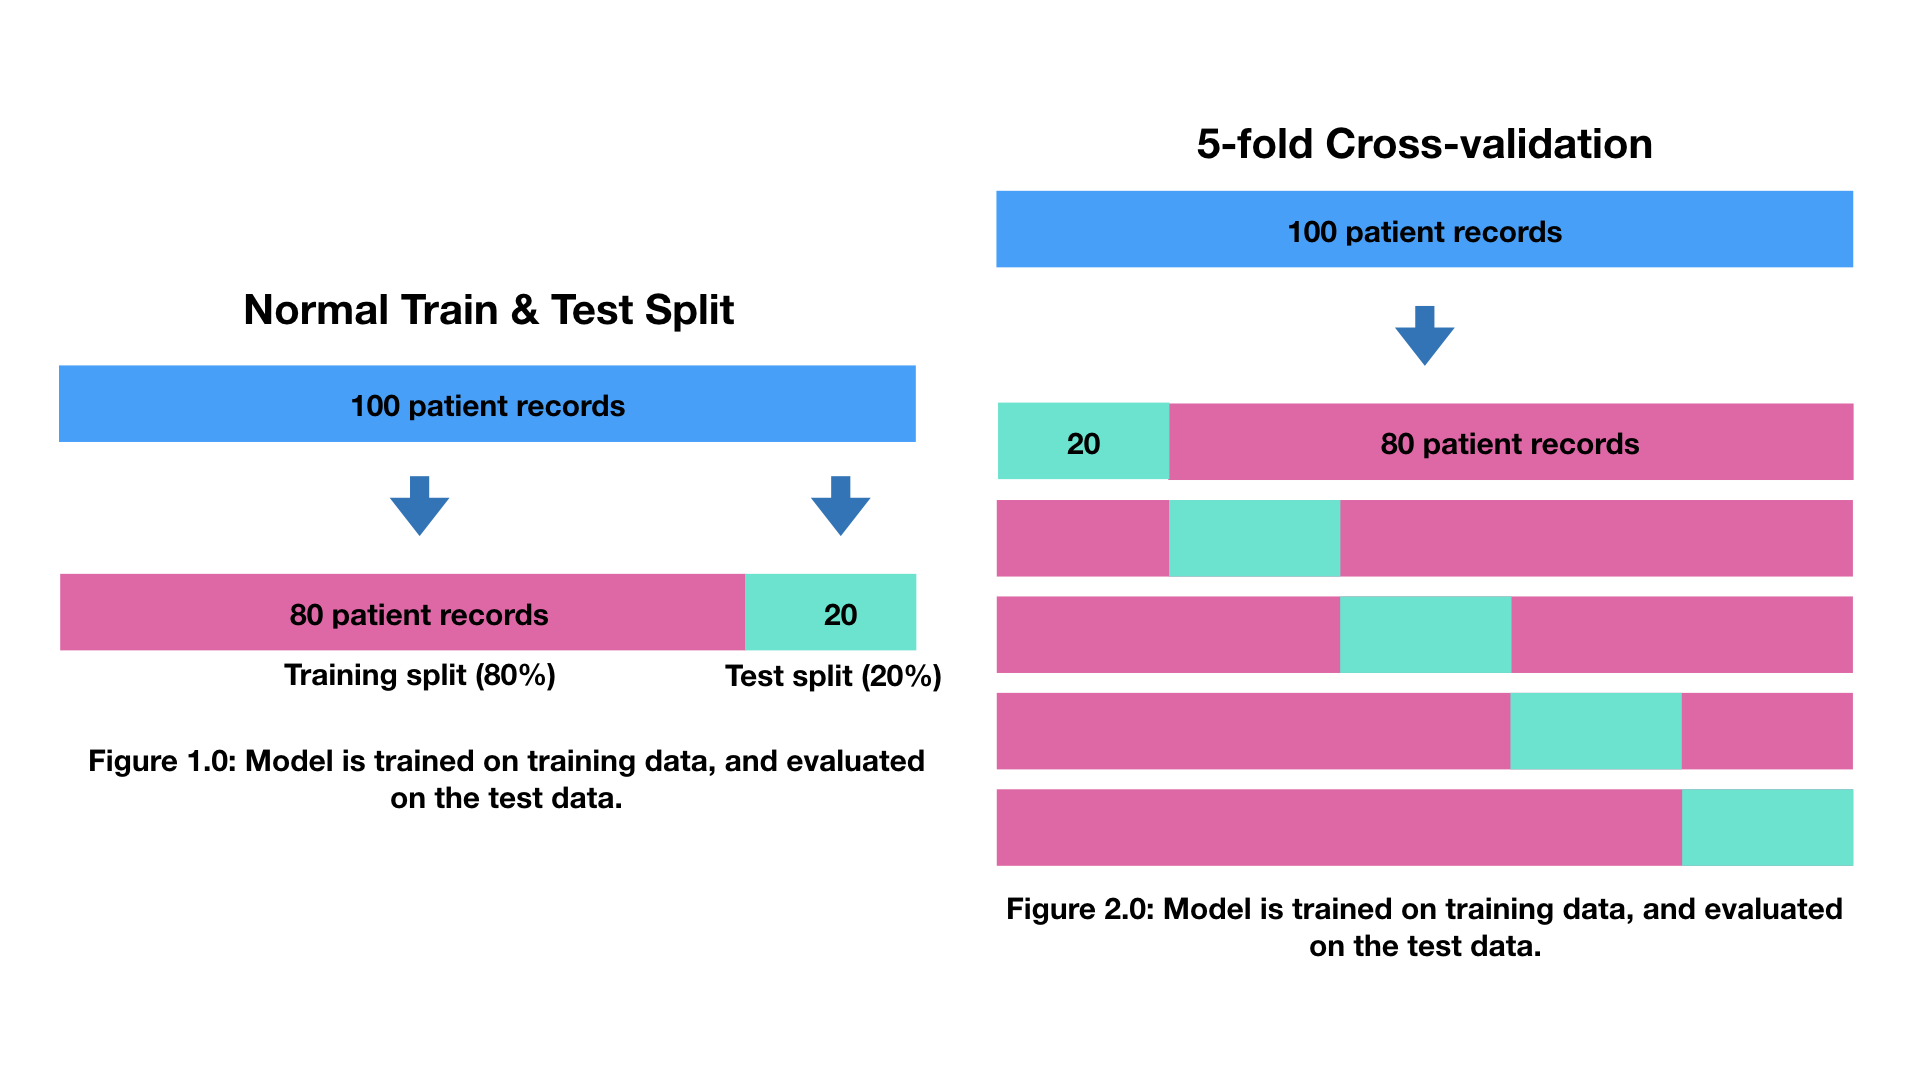

<br><br>

Instead of training only on 1 training split and evaluating on 1 testing split, 5-fold cross-validation does it 5 times. On a different split each time, returning a score for each.

_Why 5-fold ?..._
The actual name of this setup is **K-fold Cross-Validation**, where `K` is an abitrary number. We've used 5 because it looks nice visually, and will be the default in Scikit-Learn from version 0.22 onwards.

According to Figure 2.0 above, since we set `cv=5` (i.e. 5-fold Cross-Validation), we get back 5 different scores instead of 1 :

In [17]:
# 5-fold cross-validation

cross_val_score(rm_clf, X, y, cv=5) # cv is equivalent to K

array([0.85245902, 0.86885246, 0.78688525, 0.81666667, 0.75      ])

<br><br>Taking the mean of this array gives us a more in-depth idea of how our model is performing by converting the 5 scores into one.


In [18]:
rm_clf__cross_val_score = np.mean(cross_val_score(rm_clf, X, y, cv=5))

rm_score = rm_clf.score(X_test, y_test)

print('Cross Validated score =',rm_clf__cross_val_score, end='\n\n')
print('Non-Cross Validated score =',rm_score)

Cross Validated score = 0.8215846994535518

Non-Cross Validated score = 0.8524590163934426


> **Tip :** Even though CV-score is less than Non-CV-score, prefer the CV-score metric over the Non-CV metric to report the accuracy of your model.

<br><br>
By default, the `scoring` parameter is set to `None`.
<br><br>

In [16]:
# default scoring

cross_val_score(rm_clf, X, y, cv=5, scoring=None)

array([0.83606557, 0.90163934, 0.78688525, 0.81666667, 0.81666667])

<br>

Now, scoring parameter is set as "f1" i.e. `scoring="f1"`
<br><br>

In [22]:
# "f1" scoring

cross_val_score(rm_clf, X, y, cv=5, scoring="f1")

array([0.85294118, 0.86153846, 0.81818182, 0.76923077, 0.8       ])

### 4.2.1 Evaluation metrics for a Classification model

4 of the main evaluation metrics/methods that often come across, for classification models are :

1. Accuracy
2. Area under ROC (Receiver Operating Characteristic) curve
3. Confusion matrix
4. Classification report

Let's see each one on Heart Disease Classfication model : 

In [3]:
# creating dataframe by bringing  the csv
heart_disease = pd.read_csv('./datasets/heart-disease.csv')

# import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, train_test_split

np.random.seed(42)


# Split the data into X (features/data) and y (target/labels)
X = heart_disease.drop(['target'], axis=1)
y = heart_disease['target']


# Split into test & train sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


# Defining and training the classifier
rm_clf = RandomForestClassifier()
rm_clf.fit(X_train, y_train)

rm_clf.score(X_test, y_test)

0.8524590163934426

<br><br>
**1. Accuracy**

Accuracy is the default metric for the `score()` function within each of Scikit-Learn's classifier models <br>Often, this metric is most used for classification problems.

> However, **Accuracy** may not always be the best metric to use.


In [4]:
print(f"Heart Disease Classifier Accuracy: {rm_clf.score(X_test, y_test) * 100:.2f}%")

Heart Disease Classifier Accuracy: 85.25%


<br><br>

**2. Area Under Receiver Operating Characteristic (ROC) Curve**

ROC curves and AUC metrics are evaluation metrics for binary classification models.

Referred to as **"AUC" for Area Under Curve** and the curve is **Receiver Operating Characteristic or "ROC"**.

ROC curves are a comparison of - &nbsp; **true-postive-rate (TPR) &nbsp; v/s &nbsp; false-positive-rate (FPR)** - at different classification thresholds.

For clarity :

* True positive = model predicts 1 when truth is 1
* False positive = model predicts 1 when truth is 0
* True negative = model predicts 0 when truth is 0
* False negative = model predicts 0 when truth is 1

Scikit-Learn lets us calculate the information required for a ROC curve using the **`roc_curve`** function.

A metric that can be use to quantify the ROC curve in a single number is AUC (Area Under Curve) - calculated using a function called **`roc_auc_score()`**

<br><br>

In [5]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Make predictions with probabilities
y_probs = rm_clf.predict_proba(X_test)


y_probs[:5]

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

<br><br>
`.classes_` attribute can be used to recover the mapping of classifier model i.e. the order of the classes of classifier model.

Here,
* 0 => "Does not have Cancer" => **Negative class**
* 1 => "Has cancer" => **Positive class**
<br><br>

In [6]:
rm_clf.classes_

array([0, 1])

In [7]:
y_probs_positive = y_probs[:, 1]         # [row,column] ≣ capture every row followed by column with index as 1

y_probs_positive[:5]

array([0.11, 0.51, 0.57, 0.16, 0.82])

In [8]:
# Calculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

# check the False-Positive-Rate
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.03448276, 0.03448276, 0.03448276, 0.03448276, 0.06896552,
       0.06896552, 0.10344828, 0.13793103, 0.13793103, 0.17241379,
       0.17241379, 0.27586207, 0.4137931 , 0.48275862, 0.55172414,
       0.65517241, 0.72413793, 0.72413793, 0.82758621, 1.        ])

In [9]:
# check the True-Positive-Rate
tpr

array([0.     , 0.03125, 0.09375, 0.375  , 0.4375 , 0.4375 , 0.46875,
       0.59375, 0.6875 , 0.6875 , 0.71875, 0.75   , 0.75   , 0.875  ,
       0.875  , 0.96875, 0.96875, 0.96875, 0.96875, 0.96875, 0.96875,
       0.96875, 1.     , 1.     , 1.     ])

In [10]:
thresholds

array([2.  , 1.  , 0.99, 0.83, 0.82, 0.8 , 0.78, 0.74, 0.67, 0.66, 0.64,
       0.62, 0.61, 0.53, 0.51, 0.3 , 0.2 , 0.16, 0.14, 0.13, 0.11, 0.07,
       0.06, 0.05, 0.  ])

<br><br>

#### Create a function to plot ROC curve
Since Scikit-Learn doesn't have a built-in function to plot a ROC curve, so quite often, we find a function (or write your own) like the one below :

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.style.use('seaborn')

def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false-positve-rate (fpr) and 
    true-postive-rate (tpr) of a classifier.
    """
    # Plot ROC curve
    plt.xlabel('False Positive Rate (fpr)')
    plt.ylabel('True Positive Rate (tpr)')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    
    # This code brings up ROC curve on the graph
    plt.plot(fpr, tpr, color='red', label='ROC')
    
    # Plots a baseline (It has no predictive power. It's just for purpose of making a comparison)
    plt.plot([0, 1], [0, 1.2], color='darkblue', linestyle='--', label='Guessing')
    
    plt.legend()
    plt.show()

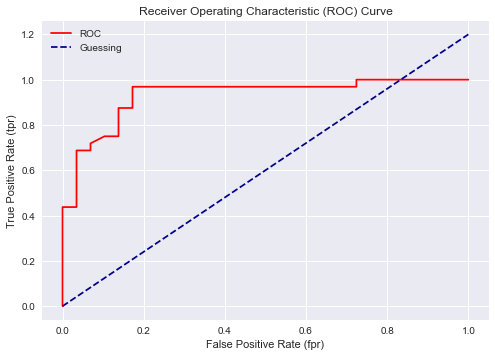

In [12]:
plot_roc_curve(fpr, tpr)

#### 🛑 Points to remember 🛑  :
> A metric that can be use to quantify the ROC curve in a single number is AUC (Area Under Curve) - calculated using a function called **`roc_auc_score()`** - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score.

> The maximum ROC AUC score achievable is 1.0

> Generally, **the closer to 1.0, the better the model.**

> The **most ideal** graph for a ROC curve is to run along the top left corner of the plot.<br>
This would mean the model predicts only true positives and no false positives. This would result in a ROC-AUC score of 1.0.

> This can be seen by creating a ROC curve using only the `y_test` labels.

> In reality, a perfect ROC curve is unlikely.

In [13]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)         # this gives the Area-Under-Curve of the ROC curve

0.9304956896551724

<br><br>

A glimpse of the ideal ROC curve...

In [97]:
fpr, tpr, thresholds = roc_curve(y_test, y_test)

fpr, tpr, thresholds

(array([0., 0., 1.]), array([0., 1., 1.]), array([2, 1, 0]))

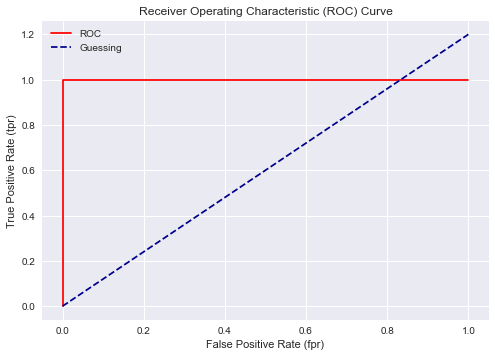

In [98]:
plot_roc_curve(fpr, tpr)

In [20]:
# Perfect ROC AUC score

roc_auc_score(y_test, y_test)

1.0

**Resources to study about ROC concept :**
- Google's ML crash-course : https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc
<br><br>
- Code examples by Scikit-Learn documentation - https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html

<br><br>

**3. Confusion matrix**

A confusion matrix is a quick way to compare the labels that a model predicts and the actual labels it was supposed to predict.

To visualize the confusion matrix `pd.crosstab()` is used :
- This function returns a data-frame.
- The entries of this dataframe sum up to Number of samples in test-set i.e. `len(X_test)`.

In essence, it gives an idea of where the model is getting confused.<br>
Documentation is here, https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

In [15]:
from sklearn.metrics import confusion_matrix

y_preds = rm_clf.predict(X_test)

confusion_matrix(y_test, y_preds)

array([[24,  5],
       [ 4, 28]])

<br>

Visualize the confusion matrix with `pd.crosstab()` :
<br><br>

In [16]:
# Visualize the confusion matrix with pd.crosstab()
# It compares between true-labels (y_test) & prediction-labels (y_preds)

pd.crosstab(y_test,
            y_preds,
            rownames=['Actual Label'],
            colnames=['Predicted Label'])

Predicted Label,0,1
Actual Label,,
0,24,5
1,4,28


In [17]:
print(len(X_test))
len(X_test) == 24 + 5 + 4 + 28

61


True

<br><br>

### <u>Anatomy of a Confusion Matrix</u> :

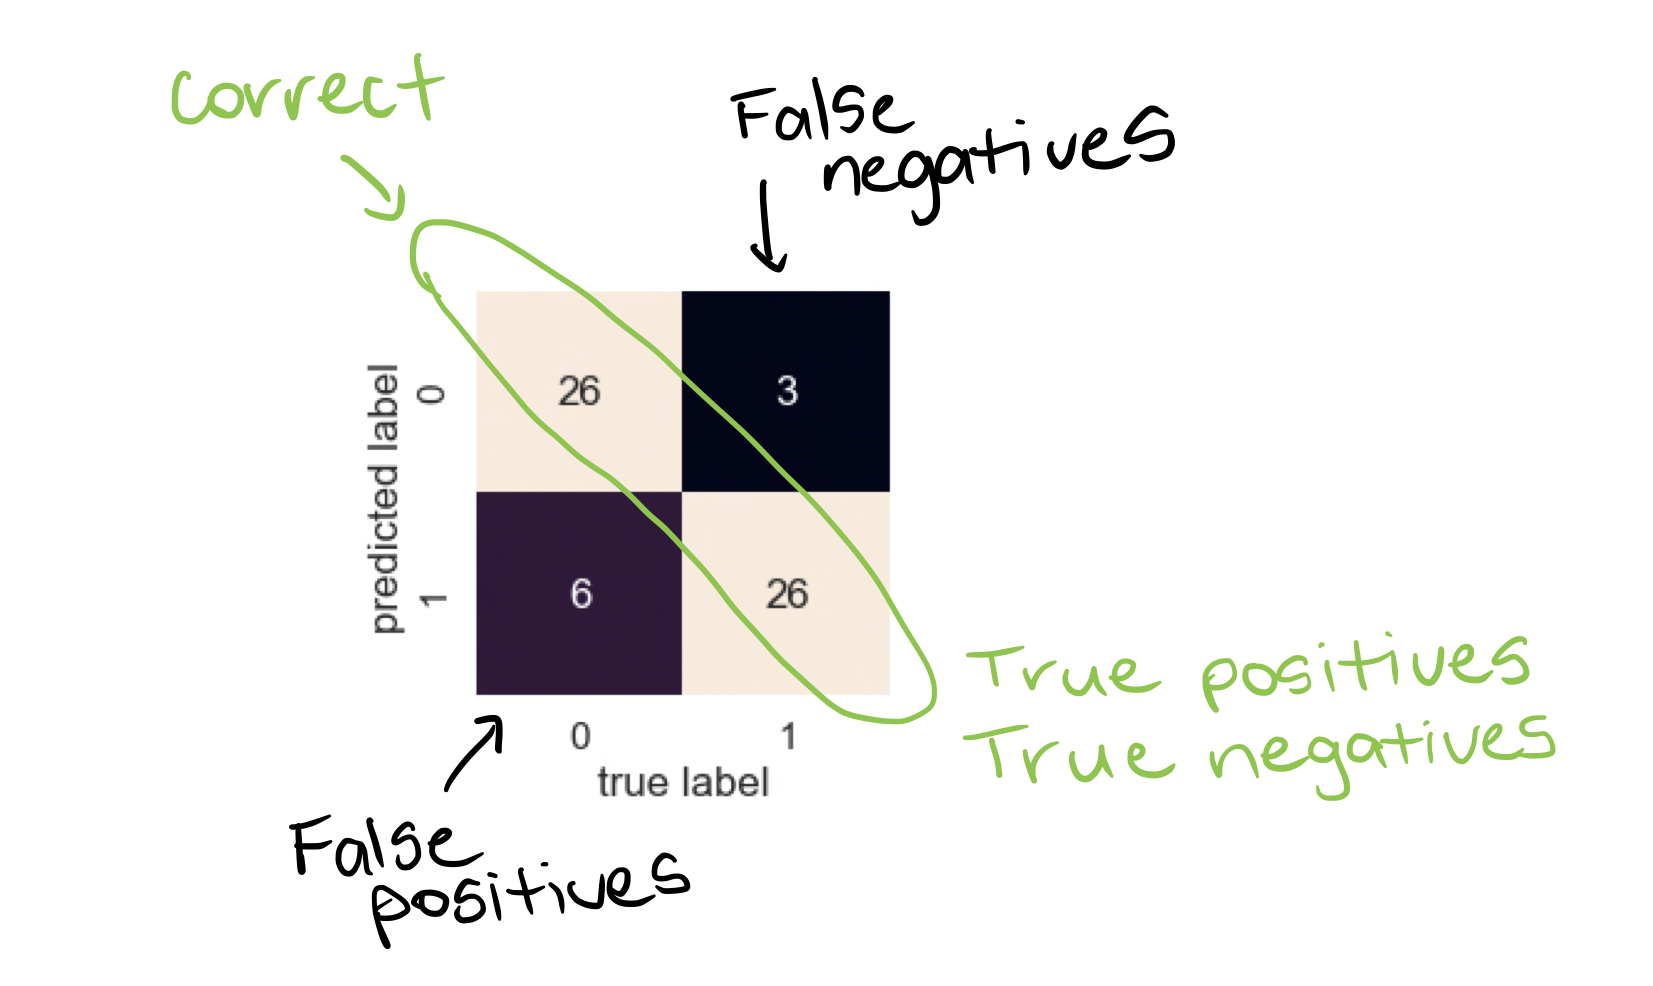

<br><br>

#### Creating a confusion matrix using Scikit-Learn

Scikit-Learn has multiple different implementations of plotting confusion matrices :

1. [`sklearn.metrics.ConfusionMatrixDisplay.from_estimator(estimator, X, y)`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html#sklearn.metrics.ConfusionMatrixDisplay.from_estimator) - This takes a fitted estimator (like our `rm_clf` model), features (`X`) and labels (`y`). And then uses the trained estimator to make predictions on `X` and compares the predictions to `y` by displaying a confusion matrix.

2. [`sklearn.metrics.ConfusionMatrixDisplay.from_predictions(y_true, y_pred)`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html#sklearn.metrics.ConfusionMatrixDisplay.from_predictions) - This takes truth labels and predicted labels and compares them by displaying a confusion matrix.

<AxesSubplot:>

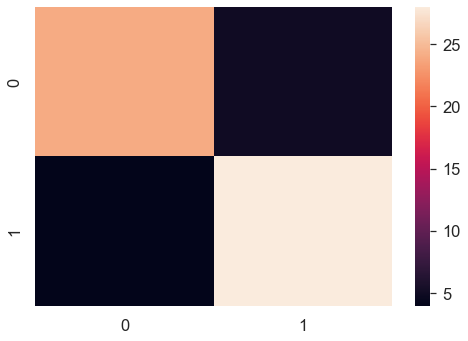

In [23]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.set(font_scale=1.5)

# creating Confusion Matrix
conf_mat = confusion_matrix(y_test, y_preds)

# Plot it using seaborn
sns.heatmap(conf_mat)

<br><br>
* **using the `ConfusionMatrixDisplay.from_estimator()` :**

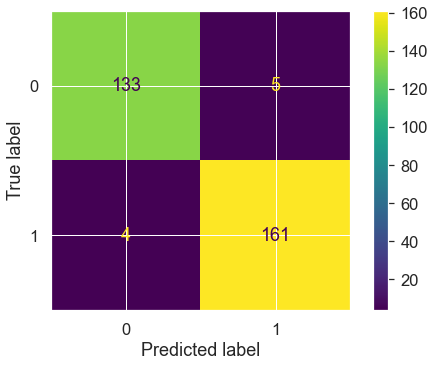

In [21]:
import seaborn as sns
sns.set(font_scale=1.5)   # setting font_scale

from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(rm_clf, X=X, y=y)

<br><br>
* **using the `ConfusionMatrixDisplay.from_predictions()` :**

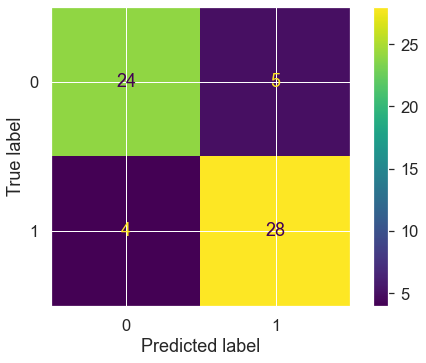

In [322]:
import seaborn as sns
sns.set(font_scale=1.5)   # setting font_scale

from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_preds)

<br><br>
**4. Classification report**

The final major metric considered to evaluate a classification model is a Classification Report.

A classification report is more so a collection of metrics rather than a single one.

To create a classification report using Scikit-Learn, the `classification_report()` function is used.

In [32]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



It returns 4 columns :
1. precision
2. recall
3. f1-score
4. support

> The number of rows will depend on how many different classes (i.e. classification labels) there are.<br>But there will always be 3 row labels i.e. **Accuracy, Macro Avg** and **Weighted Avg**.

Each term measures something slightly different :

* **Precision** - Indicates the proportion of positive identifications (model predicted class 1) which were actually correct.<br>A model which produces no false positives has a precision of 1.0.


* **Recall** - Indicates the proportion of actual positives which were correctly classified.<br>A model which produces no false negatives has a recall of 1.0.


* **F1 score** - A combination of precision and recall.<br>A perfect model achieves an F1 score of 1.0.


* **Support** - The number of samples each metric was calculated upon.


* **Accuracy** - The accuracy of the model (in decimal form).<br>Perfect accuracy is equal to 1.0, in other words, getting the prediction right 100% of the time.


* **Macro Avg** - Short for macro average; It's the average of precision, recall and F1-score between the classes.<br><br>Macro avg doesn't take Class Imbalance into effect. So, if you do have Class Imbalances (i.e. more examples of one class than another), you should pay attention to this.


* **Weighted Avg** - Short for weighted average; It's the weighted average of precision, recall and F1 score between the classes. Weighted means each metric is calculated with respect to how many samples there are in each class. This metric will favour the majority class (e.g. it will give a high value when one class out performs another due to having more samples).

<br>
_____________________________________________________________________________________________________________________________


### _When should you use each?_

It can be tempting to base a classification model's perfomance only on "Accuracy". And, Accuracy is a good metric to report, except when you have very _Imbalanced Classes_.

**For example :**

Let's say there were 10,000 people. And 1 of them had a disease. You're asked to build a model to predict who has it.

You build the model and find your model to be 99.99% accurate. Which sounds great! ...until you realise, all its doing is predicting no one has the disease, in other words all 10,000 predictions are false.

In this case, you'd want to turn to metrics such as Precision, Recall and F1-score.

In [38]:
# Where precision and recall become valuable

disease_true = np.zeros(10000)
disease_true[0] = 1

disease_preds = np.zeros(10000) # every prediction is 0

pd.DataFrame(classification_report(disease_true, 
                                   disease_preds, 
                                   output_dict=True,
                                   zero_division=0))

pd.DataFrame(classification_report(disease_true,
                                   disease_preds,
                                   output_dict=True,
                                   zero_division=0))

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


> Notice here, you got an accuracy of 0.9999 (99.99%), which is great Precision and Recall on class 0.0 but nothing for class 1.0.

<br>


#### ✅ SUMMARY on Classfication Report :

* Accuracy is a good measure to start with, if all classes are balanced (e.g. same amount of samples which are labelled with 0 or 1)


* Precision and recall become more important when classes are imbalanced.


* If false positive predictions are worse than false negatives, aim for a higher Precision.


* If false negative predictions are worse than false positives, aim for a higher Recall.

<br>
_________________________________________________________________________________________________________________________________

<br><br><br>

### 4.2.2 Evaluation metrics for Regression models

As similar for the Classification Models, there are [several metrics used to evaluate Regression Models](https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics) :

1. **R² (pronounced r-squared) or Coefficient of Determination -** Compares a model's predictions to the mean of the targets.<br>Values can range from `-INF` (which would be very poor model) to 1.<br><br>For example, if all your model does is predict the mean of the targets, its R² value would be 0. And if your model perfectly predicts a range of numbers it's R² value would be 1.


2. **Mean Absolute Error (MAE) -** The average of the absolute differences between predictions and actual values. It gives an idea of how wrong the predictions were.


3. **Mean Squared Error (MSE) -** The mean of square of the differences between predictions and actual values.<br> Squaring the errors removes negative errors.<br>**It also amplifies outliers (samples which have larger errors).**

In [43]:
# Import the RandomForestRegressor model class from the ensemble module

from sklearn.ensemble import RandomForestRegressor

# Setup random seed
np.random.seed(42)

# Create the data
X = housing_df.drop("target", axis=1)
y = housing_df["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate and fit the model (on the training set)
model = RandomForestRegressor()
model.fit(X_train, y_train);

**1. R² Score (Coefficient of Determination) :**

Once you've got a trained regression model, the default evaluation metric in the `score()` function is R².

> Press Tab key, when inside `.score()` function, to see the docstring of it which says about R².

In [46]:
model.score(X_test, y_test)


0.8066196804802649

<br><br>
Outside of the `score()` function, the R² can be calculated using Scikit-Learn's [`r2_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score) function.

In [57]:
from sklearn.metrics import r2_score

> A model which correctly predicts the mean of the targets only, would get a score of `0`.

In [60]:
# Fill an np-array with each value equal to the mean of y_test Series

y_test_mean = np.full(len(y_test), y_test.mean())   

r2_score(y_true=y_test,
         y_pred=y_test_mean)

0.0

> And a perfect model (which correctly makes prediction equal to y_test), would get a score of `1`.

In [61]:
r2_score(y_true=y_test,
         y_pred=y_test)

1.0

> For regression models, you would want to maximise R², whilst minimising MAE and MSE.

<br><br>
**2. Mean Absolute Error (MAE) :**

A model's Mean Absolute Error can be calculated with Scikit-Learn's [`mean_absolute_error()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html) function.

In [73]:
# Mean absolute error

from sklearn.metrics import mean_absolute_error

y_preds = model.predict(X_test)

mae = mean_absolute_error(y_true=y_test,
                          y_pred=y_preds)

mae

0.3265721842781009

So this dataset achieves an MAE of 0.3266.<br>This means, on average our model's predictions are `0.3266` units away (either plus or minus) from the actual value.

Let's make it a little more visual :

In [92]:
df = pd.DataFrame(data={"actual values": y_test, 
                        "predicted values": y_preds})

df['differences'] = df['predicted values'] - df['actual values']

df.head(10)

,actual values,predicted values,differences
20046,0.47700,0.493840,0.016840
3024,0.45800,0.754940,0.296940
15663,5.00001,4.928596,-0.071414
20484,2.18600,2.540290,0.354290
9814,2.78000,2.331760,-0.448240
13311,1.58700,1.654970,0.067970
7113,1.98200,2.343230,0.361230
7668,1.57500,1.661820,0.086820
18246,3.40000,2.474890,-0.925110
5723,4.46600,4.834478,0.368478


<br><br>

**Note :** 1st row of `df` says that, For a house -><br>

Actual Value = $ 47.7K

Predicted Value = $ 49.38K

So, difference = Actual - Predicted = $ 1.68K

...and so on for other rows.

<br><br>

MAE can also be calculated and understood in this way :

In [89]:
np.abs(df['differences']).mean()

# this value is same as that obtained from the mean_absolute_error() function

0.3265721842781009

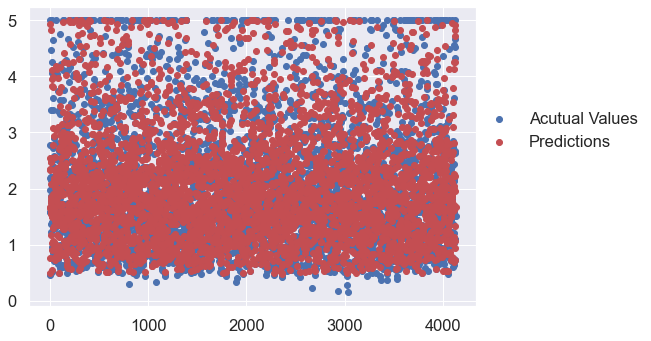

In [72]:
fig, ax = plt.subplots()

x = np.arange(0, len(df), 1)

ax.scatter(x, df["actual values"], c='b', label="Acutual Values")
ax.scatter(x, df["predictions"], c='r', label="Predictions")
ax.legend(loc=(1, 0.5));

<br><br>

**3. Mean Squared Error (MSE) :** Calculate it with Scikit-Learn's `mean_squared_error()`.

In [93]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_preds)

mse

0.2534073069137548

<br><br>


### Which Regression Metric to use ?

1. • **R²** is similar to Accuracy. It gives a quick indication of how well the model might do.<br><br>
• Generally, the closer R² value is to `1.0`, the better is the model.<br><br>
• But it doesn't really tell exactly how wrong the model is, in terms of how far off each prediction is.


2. **MAE** gives a better indication of how far off each of a model's predictions are, on average.


3. As for **MAE** or **MSE**, because of the way MSE is calculated, squaring the differences between Predicted Values and Actual Values, it amplifies larger differences.

<br>
____________________________________________________________________________________________________________________________________

<br><br>

### 4.2.3 Finally, using the `scoring` parameter :

The `scoring` parameter can be used with a function like `cross_val_score()` to tell Scikit-Learn what evaluation metric to return using cross-validation.

Let's check it out with [Classification Model](https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics) on the Heart Disease dataset :

In [87]:
heart_disease = pd.read_csv('./datasets/heart-disease.csv')

In [8]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier(n_estimators=100)

Firstly, let's use the default method - Accuracy.

In [9]:
np.random.seed(42)

# Cross-Validation Accuracy
cv_acc = cross_val_score(clf, X, y, cv=5, scoring=None)

# cv=5 - the Training and Test sets will be randomly splited 5 times.
# scoring=None - the function uses "accuracy" as scoring parameter, by default.

cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

So, we get **5** different accuracy scores on different test splits of the Heart Disease dataset.

Averaging this gives the Cross-Validated Accuracy score :

In [34]:
print('Cross Validation Accuracy score =', round(float(np.mean(cv_acc)*100),2))

Cross Validation Accuracy score = 82.48


<br>

The same can be done using the `scoring` parameter and passing it `"accuracy"`.

In [47]:
np.random.seed(42)

cv_acc = cross_val_score(clf, X, y, cv=5, scoring="accuracy")

print(cv_acc)
print('Cross Validation Accuracy score =', round(float(np.mean(cv_acc)*100),2))

[0.81967213 0.90163934 0.83606557 0.78333333 0.78333333]
Cross Validation Accuracy score = 82.48


The same goes for the other metrics we've been using for classification.

• let's try `"precision"` :

In [53]:
np.random.seed(42)

cv_precision = cross_val_score(clf, X, y, cv=5, scoring="precision")

print(cv_precision)
print('Cross Validation Precision score =', round(float(np.mean(cv_precision)),3))

[0.82352941 0.93548387 0.84848485 0.79411765 0.76315789]
Cross Validation Precision score = 0.833


<br>

• `"recall"` :

In [52]:
np.random.seed(42)

cv_recall = cross_val_score(clf, X, y, cv=5, scoring="recall")

print(cv_recall)
print('Cross Validation Recall score =', round(float(np.mean(cv_recall)),3))

[0.84848485 0.87878788 0.84848485 0.81818182 0.87878788]
Cross Validation Recall score = 0.855


<br>

• `"f1 score"` :

In [51]:
np.random.seed(42)

cv_f1Score = cross_val_score(clf, X, y, cv=5, scoring="f1")

print(cv_f1Score)
print('Cross Validation F1 score =', round(float(np.mean(cv_f1Score)),3))

[0.8358209  0.90625    0.84848485 0.80597015 0.81690141]
Cross Validation F1 score = 0.843


<br>


Let's check it out with [Regression Model](https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics) on the Housing Dataset :

In [55]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

housing_df = pd.DataFrame(housing["data"], columns=housing["feature_names"])

housing_df["target"] = pd.Series(housing["target"])

housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [56]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = housing_df.drop("target", axis=1)
y = housing_df["target"]

model = RandomForestRegressor(n_estimators=100)

<br>

• The default is `"R²"` :

In [58]:
np.random.seed(42)

cv_r2 = cross_val_score(model, X, y, cv=5, scoring=None)

print(cv_r2)
print(f"The cross-validated R² score is: {np.mean(cv_r2):.2f}")

[0.51682354 0.70280719 0.74200859 0.61659773 0.68247339]
The cross-validated R² score is: 0.65


• `"neg_mean_absolute_error"` for MAE (Mean Absolute Error) :

In [64]:
np.random.seed(42)

cv_mae = cross_val_score(model, X, y, cv=5, scoring="neg_mean_absolute_error")

print(cv_mae)
print(f"The Cross-Validated MAE score is: {np.mean(cv_mae):.2f}")

[-0.54255936 -0.40903449 -0.43716367 -0.46911343 -0.47319069]
The Cross-Validated MAE score is: -0.47


<br><br>

#### ✅ Why the "neg_" ?

Because Scikit-Learn documentation states:

> ["All scorer objects follow the convention that higher return values are better than lower return values."](https://scikit-learn.org/stable/modules/model_evaluation.html#common-cases-predefined-values)

Which in this case means, **a lower negative value (closer to 0) is better.**

<br><br>

• `"neg_mean_squared_error"` for MSE (Mean Squared Error) :

In [65]:
np.random.seed(42)

cv_mse = cross_val_score(model, 
                         X, 
                         y, 
                         cv=5,
                         scoring="neg_mean_squared_error")

print(f"The Cross-Validated MSE score is: {np.mean(cv_mse):.2f}")

The Cross-Validated MSE score is: -0.43


<br><br>
## 4.3 Using different evaluation metrics with Scikit-Learn

The 3rd way to evaluate scikit-learn machine learning models/estimators is to use the `sklearn.metrics` module -<br>https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics

Similar to how the `scoring` parameter can be passed for different scoring functions, Scikit-Learn implements these as stand alone functions.

They all work by comparing an array of predictions, usually called `y_preds` to an array of actual labels, usually called `y_test` or `y_true`.

#### Classification metric functions

For:

* **Accuracy** - `accuracy_score()`
* **Precision** - `precision_score()`
* **Recall** - `recall_score()`
* **F1** - `f1_score()`

> The difference between, using Metric Functions as compared to `scoring` paramaeter (in `cross_val_score()`), is that the later takes into account **Cross Validation** also, hence generating a better metric score/value whereas the former does not.

In [88]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)

# Make predictions
y_preds = clf.predict(X_test)

# Evaluate the classifier
print("Classifier metrics on the Heart Disease test set :")
print(f"Accuracy: {accuracy_score(y_test, y_preds) * 100:.3f}%")
print(f"Precision: {precision_score(y_test, y_preds):.4f}")
print(f"Recall: {recall_score(y_test, y_preds):.4f}")
print(f"F1: {f1_score(y_test, y_preds):.4f}")

Classifier metrics on the Heart Disease test set :
Accuracy: 85.246%
Precision: 0.8485
Recall: 0.8750
F1: 0.8615


#### Regression metric functions

For:

* R² - `r2_score()`
* MAE - (Mean Absolute Error) - `mean_absolute_error()`
* MSE (Mean Squared Error) - `mean_squared_error()`

In [62]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)

X = housing_df.drop("target", axis=1)
y = housing_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2)

model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)

# Make predictions
y_preds = model.predict(X_test)

# Evaluate the model
print("Regression model metrics on the Housing test set :")
print(f"R²: {r2_score(y_test, y_preds):.3f}")
print(f"MAE: {mean_absolute_error(y_test, y_preds):.4f}")
print(f"MSE: {mean_squared_error(y_test, y_preds):.4f}")

Regression model metrics on the Housing test set :
R²: 0.807
MAE: 0.3266
MSE: 0.2534


___________________________________________________

## 5. Improving model predictions through experimentation (hyperparameter tuning)

Generally,

First Model = baseline model.<br>
First Predictions = baseline predictions.<br>
First evaluation metrics = baseline metrics.

The next step should be to improve these "baseline metrics".

2 of the main methods to improve baseline metrics are from a _data perspective_ and a _model perspective_.

**1. From a data perspective asks :**

* Could we collect more data?<br>In machine learning, more data is generally better, as it gives a model more opportunities to learn patterns.

* Could we improve our data?<br>This could mean filling in misisng values or finding a better encoding (turning things into numbers) strategy.


**2. From a model perspective asks :**

* Is there a better model could be used ?

* If one has started out with a simpler model, could you use a more complex one now ? (one can take help from [Scikit-Learn machine learning map](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html), to decide on this.)<br>For example : Ensemble methods are generally considered more complex models than Linear SVMs.

>  #### 🛑 Note 🛑 :
Patterns in data are also often referred to as "data parameters".<br><br>
Parameters vs Hyperprameters :<br>
**• parameters =** using these a machine learning model seeks to find parameters in data.<br>
**• hyperparameters =** are settings on a model which a programmer (you) can adjust (potentially) to find patterns in data.

<br><br>

The hyperparameters of a model/estimator can be found by **`get_params()`** :

In [73]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

In [74]:
clf.get_params()       # "baseline parameters" of RandomForestClassifier estimator 

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

`max_depth`, `min_samples_split`, `n_estimators`...each of these is a hyperparameter of the RandomForestClassifier capable to adjust.

The default hyperparameters on a machine learning model may find patterns in data well. But there's a chance a adjusting the hyperparameters may improve a models performance.

The [Scikit-Learn documentation for the Random Forest Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html), suggests to try to tune below hyperparameters :

* `n_estimators` = the number of trees in the forest.


* `min_samples_split` = the minimum number of samples required to split an internal node.


* `max_features` = the number of features to consider when looking for the best split.


* `max_depth` = the maximum depth of the tree.


* `min_samples_leaf` = the minimum number of samples required to be at a leaf node.


### 5.1 Tuning hyperparameters by hand

So far, training and test datasets were involved i.e. train a model on a training set and evaluate it on a test dataset.

But hyperparameter tuning introduces a thrid set, a **validation set**.

Now the process becomes, train a model on the training data, (try to) improve its hyperparameters on the validation set and evaluate it on the test set.
<br><br>

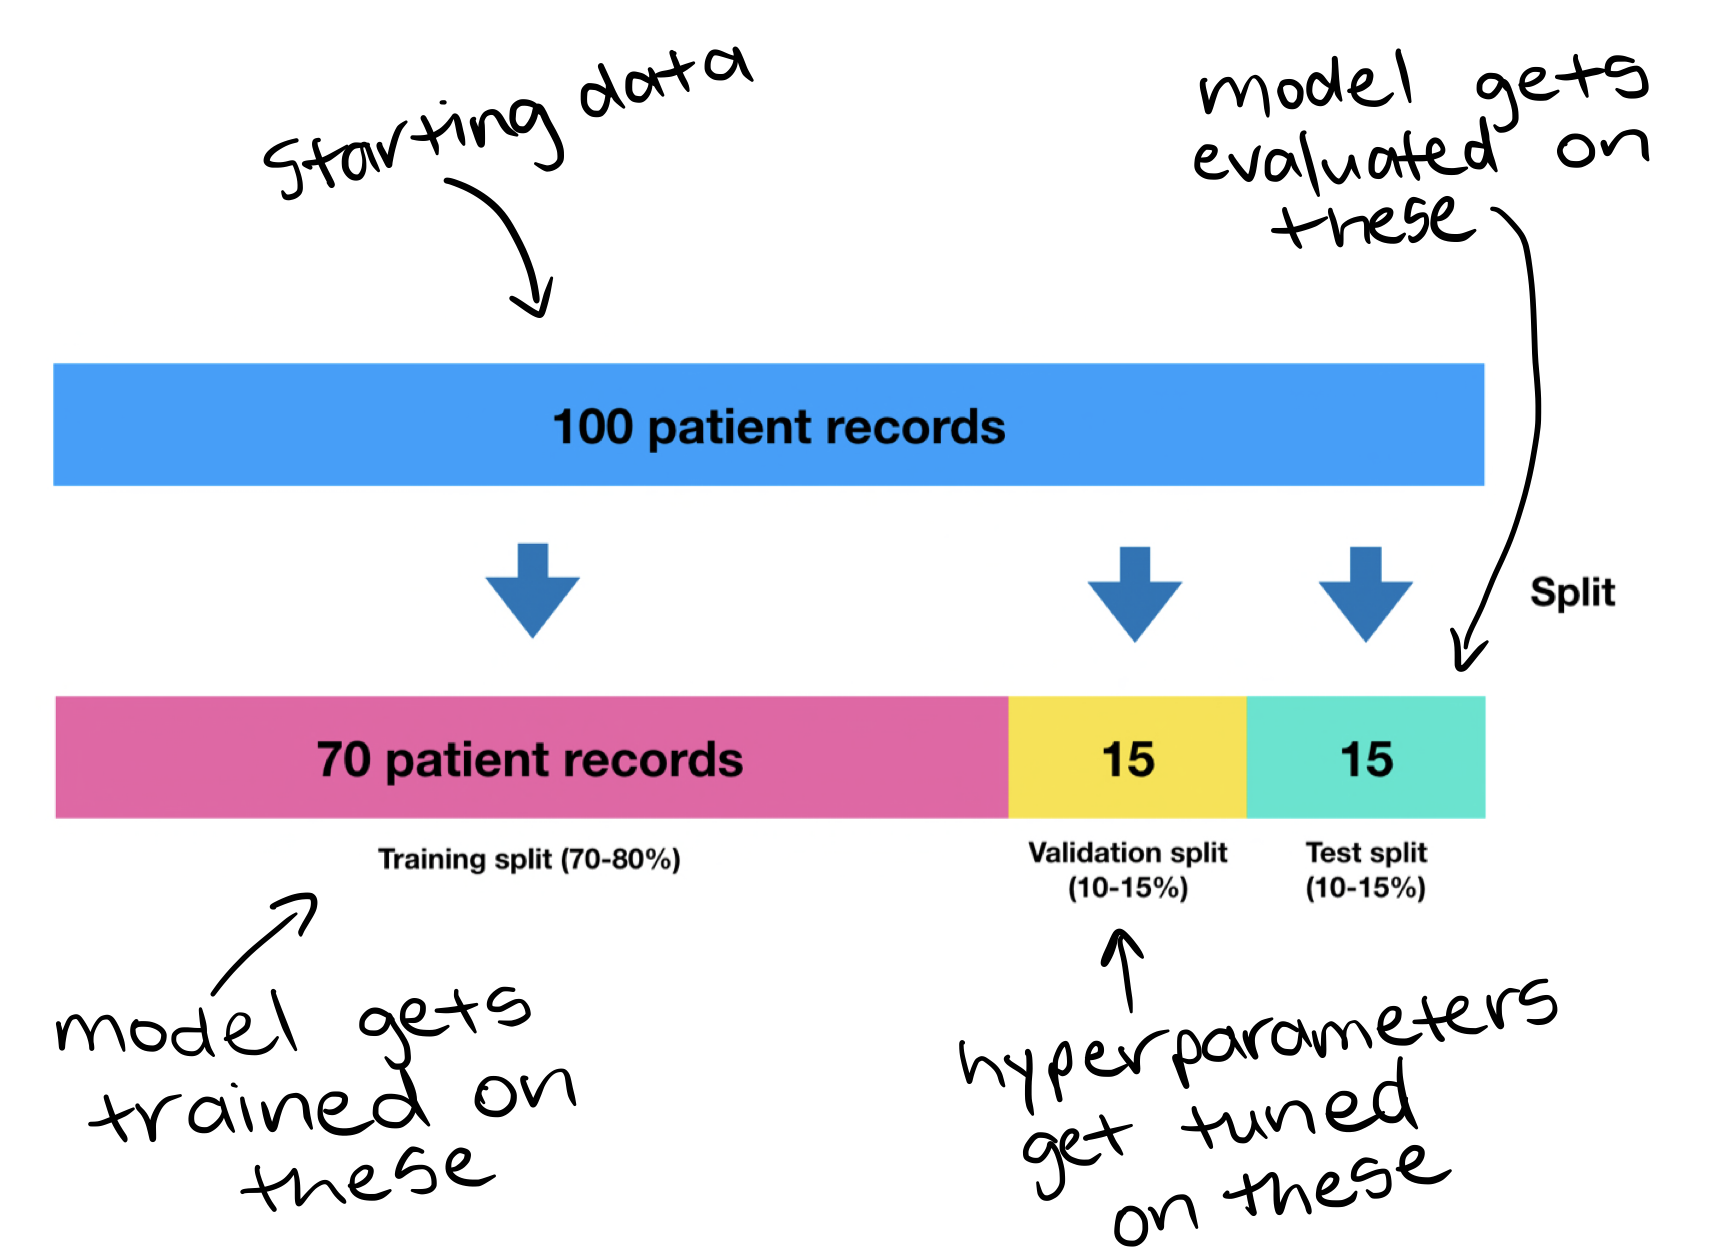

<br><br>

**Example :** Consider RandomForestClassifier model (`clf`) and it's baseline hyperparameters provided by it via `get_params()`.

We'll adjust these :
- `max_depth`
- `max_features`
- `min_samples_leaf`
- `min_samples_split`
- `n_estimators`

In [75]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

<br><br>

In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
def evaluate_preds(y_true, y_preds):
    """
    Performs evaluation comparison on "y_true" labels vs "y_preds" labels
    on a classification model.
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)

    metric_dict = {
                    "accuracy": round(accuracy, 2),
                    "precision": round(precision, 2),
                    "recall": round(recall, 2),
                    "f1": round(f1, 2)
                  }
    
    print(f"Accuracy = {accuracy*100:.2f}%")
    print(f"Precision = {precision:.2f}")
    print(f"Recall = {recall:.2f}")
    print(f"F1 Score = {f1:.2f}")
    
    return metric_dict

In [81]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Shuffle the data
heart_disease_shuffled = heart_disease.sample(frac=1)

# Split into X & y
X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

# Split the data into train, validation & test sets
train_split = round(0.7 * len(heart_disease_shuffled))                       # 70% of data

valid_split = round(train_split + 0.15 * len(heart_disease_shuffled))        # 15% of data

X_train, y_train = X[:train_split], y[:train_split]

X_valid, y_valid = X[train_split:valid_split], y[train_split:valid_split]

X_test, y_test = X[valid_split:], y[valid_split:]



clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Make predictions
y_preds = clf.predict(X_valid)

# Evaluate the classifier
baseline_metrics = evaluate_preds(y_valid, y_preds)
baseline_metrics

Accuracy = 82.22%
Precision = 0.81
Recall = 0.88
F1 Score = 0.85


{'accuracy': 0.82, 'precision': 0.81, 'recall': 0.88, 'f1': 0.85}

<br><br>

___________________________

## 5.2 Hyperparameter tuning with [RandomizedSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)

Scikit-Learn's `RandomizedSearchCV` allows us to randomly search across different hyperparameters to see which work best. It also stores details about the ones which work best!

Firstly, create a grid (i.e. dictionary) of hyperparameters that are likely to be searched over :

In [8]:
# Hyperparameter grid RandomizedSearchCV will search over

grid = {"n_estimators": [10, 100, 200, 500, 1000, 1200],
        "max_depth": [None, 5, 10, 20, 30],
        "max_features": ["auto", "sqrt"],
        "min_samples_split": [2, 4, 6],
        "min_samples_leaf": [1, 2, 4]
       }

How many models will it test ?

*As many as there are for each combination of hyperparameters to be tested i.e. :*

`max_depth` = 5, `max_features` = 2, `min_samples_leaf` = 3, `min_samples_split` = 3, `n_estimators` = 6. That's 5x2x3x3x6 = **540 models!** Further more, if parameter `cv=5`. Then, **total number of models = 2700 models!** 

Or...

The `n_iter` parameter can also be set to limit the number of models which `RandomizedSearchCV` tests.


**Note :** Depending on `n_iter` (how many models you test), the different values in the hyperparameter grid, and the power of your computer, running the cell below may take a while.

**Note 2 :** The results we get will be **cross-validated** (hence the "CV" in `RandomizedSearchCV`) so we can use `train_test_split()`.

In [26]:
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Shuffle the data
heart_disease_shuffled = heart_disease.sample(frac=1)

# Split into X & y
X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


# Set n_jobs to -1 to use all cores (NOTE: n_jobs=-1 is broken as of Dec'2019. Using n_jobs=1 works. Source: Github)
clf = RandomForestClassifier(n_jobs=1)


# Setup RandomizedSearchCV
rs_clf = RandomizedSearchCV(estimator=clf,
                            param_distributions=grid,
                            n_iter=20,                    # try 20 models total
                            cv=5,                         # 5-fold cross-validation
                            verbose=2)                    # print out results


# Fit the RandomizedSearchCV version of clf
rs_clf.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   0.3s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=100; to

[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=1000; total time=   1.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=1000; total time=   1.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   0.5s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   0.5s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   0.5s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   0.5s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   0.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=1200; total time=   1.3s
[CV] END max_depth=10, max_

<br><br>

When `RandomizedSearchCV` goes through `n_iter` combinations of hyperparameter search space, it stores the best ones in the attribute `best_params_`.

In [27]:
rs_clf.best_params_

{'n_estimators': 200,
 'min_samples_split': 6,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 5}

<br><br>

Call `predict()` on `rs_clf` (our RandomizedSearchCV version of our classifier), it'll use the best hyperparameters it found :

In [28]:
# Make predictions with the best hyperparameters
rs_y_preds = rs_clf.predict(X_test)

# Evaluate the predictions
rs_metrics = evaluate_preds(y_test, rs_y_preds)

Accuracy = 80.33%
Precision = 0.84
Recall = 0.79
F1 Score = 0.81


n_iter = 30, cv = 5 (i.e. 150 fits)

{
 'n_estimators': 200,
 'min_samples_split': 6,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 5
 }


Accuracy = 81.97%
Precision = 0.84
Recall = 0.82
F1 Score = 0.83

n_iter = 20, cv = 5 (i.e. 100 fits)

{
 'n_estimators': 200,
 'min_samples_split': 6,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 5
 }


Accuracy = 80.33%
Precision = 0.84
Recall = 0.79
F1 Score = 0.81

n_iter = 10, cv = 5 (i.e. 50 fits)

{
 'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 20
 }


Accuracy = 83.61%
Precision = 0.87
Recall = 0.82
F1 Score = 0.84

<br><br>
*****

## 5.3 Hyperparameter tuning with [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

The main difference between **`GridSearchCV`** and **`RandomizedSearchCV`** is :<br>GridSearchCV searches across a grid of hyperparamters exhaustively, whereas,<br>RandomizedSearchCV searches across a grid of hyperparameters randomly (stopping after `n_iter` combinations).

Since we've already tried to find some ideal hyperparameters using `RandomizedSearchCV`, we'll create another hyperparameter grid based on the `best_params_` of **`rs_clf`** with less options and then try to use GridSearchCV to find a more ideal set.

> **Note :** Based on the `best_params_` of `rs_clf` implies the next set of hyperparameters we'll try are roughly in the same range of the best set found by RandomizedSearchCV.

In [29]:
# Another hyperparameter grid similar to rs_clf.best_params_

grid_2 = {'n_estimators': [1200, 1500, 2000],
          'max_depth': [None, 5, 10],
          'max_features': ['auto', 'sqrt'],
          'min_samples_split': [4, 6],
          'min_samples_leaf': [1, 2]
         }

<br><br>
That's 3x3x2x2x2 = 72 models in total. Or about 7 times less (540/72) combinations of hyperparameters less than our original grid.

Now, when we run `GridSearchCV` passing it our classifier (`clf`), paramter grid (`grid_2`) and the number of cross-validation folds (`cv`), it'll create a model with every single combination of hyperparameters, 72 in total, and check the results :

In [92]:
from sklearn.model_selection import GridSearchCV, train_test_split

np.random.seed(42)

# Split into X & y
X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Set n_jobs to -1 to use all cores (NOTE: n_jobs=-1 is broken as of Dec'2019. Using n_jobs=1 works. Source: Github)
clf = RandomForestClassifier(n_jobs=1)

# Setup GridSearchCV
gs_clf = GridSearchCV(estimator=clf,
                      param_grid=grid_2,
                      cv=5,                     # 5-fold cross-validation
                      verbose=2)                # print out progress

# Fit the RandomizedSearchCV version of clf
gs_clf.fit(X_train, y_train);

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200; total time=   1.4s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200; total time=   1.3s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200; total time=   1.4s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200; total time=   1.2s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200; total time=   1.2s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1500; total time=   1.6s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1500; total time=   1.6s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_s

[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=1500; total time=   1.5s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=1500; total time=   1.6s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=1500; total time=   1.5s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=2000; total time=   2.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=2000; total time=   2.4s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=2000; total time=   2.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=2000; total time=   2.5s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=2000; total time=   2.2s
[CV] END max_dep

[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=2000; total time=   2.2s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=1200; total time=   1.3s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=1200; total time=   1.3s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=1200; total time=   1.3s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=1200; total time=   1.3s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=1200; total time=   1.3s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=1500; total time=   1.7s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=1500; total time=   1.7s
[CV] END max_depth=5, max_features=auto,

[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1500; total time=   1.7s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1500; total time=   1.7s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=2000; total time=   2.3s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=2000; total time=   2.3s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=2000; total time=   2.3s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=2000; total time=   2.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=2000; total time=   2.3s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=1200; total time=   1.4s
[CV] END max_depth=5, max_features=sqrt,

[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1200; total time=   1.2s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1200; total time=   1.2s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1200; total time=   1.2s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1500; total time=   1.5s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1500; total time=   1.5s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1500; total time=   1.5s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1500; total time=   1.5s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1500; total time=   1.5s
[CV] END max_depth=10, max_featu

[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=2000; total time=   2.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=2000; total time=   2.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=2000; total time=   2.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=2000; total time=   2.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=2000; total time=   2.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.5s
[CV] END max_depth=10, max_featu

In [93]:
gs_clf.best_params_

{'max_depth': 5,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 1200}

In [94]:
# Make predictions with the best hyperparameters
gs_y_preds = gs_clf.predict(X_test)

# Evaluate the predictions
gs_metrics = evaluate_preds(y_test, gs_y_preds)

Accuracy = 85.25%
Precision = 0.84
Recall = 0.87
F1 Score = 0.86


<br><br>
Create a DataFrame to compare the different metrics :

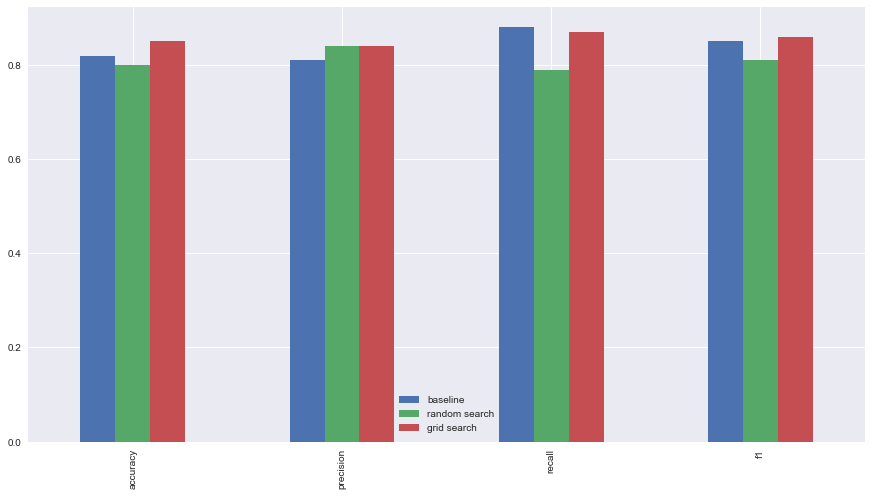

In [100]:
compare_metrics = pd.DataFrame({
                                "baseline": baseline_metrics,
                                "random search": rs_metrics,
                                "grid search": gs_metrics
                              })


compare_metrics.plot.bar(figsize=(15, 8));

In [96]:
compare_metrics

,baseline,random search,grid search
accuracy,0.82,0.80,0.85
precision,0.81,0.84,0.84
recall,0.88,0.79,0.87
f1,0.85,0.81,0.86


<br><br>

A few next ideas to try :

* Collecting more data - Based on the results our models are getting now, it seems like they're finding some patterns. Collecting more data may improve a models ability to find patterns. However, your ability to do this will largely depend on the project you're working on.

* Try a more advanced model - Although our tuned Random Forest model is doing pretty well, a more advanced ensemble method such as XGBoost or CatBoost might perform better.

<br><br>

________________________________________________________

> ### 🛑 _IMPORTANT NOTE_ 🛑 :
Metric results of 3 different models are compared in the above bar chart, `clf`(baseline), `gs_clf`(GridSearchCV), `rs_clf`(RandomizedSearchCV), but **make sure models are compared on the same splits of data** (which is not the case here in this notebook).
________________________________________________________

<br><br>

## 6. Saving and loading trained machine learning models

### 6.1 Saving and loading a model with [pickle](https://docs.python.org/3/library/pickle.html)

Use pickle's `dump()` function and pass it the model, `gs_clf`, along with the `open()` function containing a string for the filename we want to save our model as, along with the `"wb"` string - it stands for "write binary", which is the file type `open()` function will write that model as.

In [97]:
import pickle

# Save an existing model to file
pickle.dump(gs_clf, open("./resources/gs_random_forest_model_1.pkl", "wb"))


<br>

A saved model can be imported using pickle's `load()` function, passing it `open()` containing the filename as a string and `"rb"` standing for "read binary".

Once trained model is reimported using pickle, it can be used to make predictions as usual.

In [98]:
# Load a saved model
loaded_pickle_model = pickle.load(open("./resources/gs_random_forest_model_1.pkl", "rb"))


In [99]:
# Make predictions and evaluate the loaded model

pickle_y_preds = loaded_pickle_model.predict(X_test)

evaluate_preds(y_test, pickle_y_preds)

Accuracy = 85.25%
Precision = 0.84
Recall = 0.87
F1 Score = 0.86


{'accuracy': 0.85, 'precision': 0.84, 'recall': 0.87, 'f1': 0.86}

<br><br>

### 6.2 Saving and loading a model with [joblib](https://joblib.readthedocs.io/en/latest/persistence.html)

The other way to load and save models is with `joblib`, which works relatively the same as `pickle`.

To save a model, we can use joblib's `dump()` function, passing it the model (for eg, `gs_clf`) and the desired filename.

A saved model can imported using `load()` and passing it the filename of the model to make predictions as usual.

In [101]:
from joblib import dump, load

# Save a model to file
dump(gs_clf, filename="./resources/gs_random_forest_model_1.joblib")

['./resources/gs_random_forest_model_1.joblib']

In [102]:
# Import a saved joblib model

loaded_joblib_model = load(filename="./resources/gs_random_forest_model_1.joblib")


In [103]:
# Make and evaluate joblib predictions

joblib_y_preds = loaded_joblib_model.predict(X_test)

evaluate_preds(y_test, joblib_y_preds)

Accuracy = 85.25%
Precision = 0.84
Recall = 0.87
F1 Score = 0.86


{'accuracy': 0.85, 'precision': 0.84, 'recall': 0.87, 'f1': 0.86}

<br><br>

____________________________________________________________________________________________________

## 7. Putting it all together - use of `sklearn.Pipeline`

Let's consider Car Sales Regression problem (predicting the sale price of cars) as an example.

To tidy things up, use Scikit-Learn's **Pipeline class**. Imagine Pipeline as being a way to string together a number of different Scikit-Learn processes together.

### 7.1 Creating a regression Pipeline

Way back in [Section 1: Getting Data Ready](#1.-Getting-the-data-ready) , we dealt with the Car Sales data, to build a Regression Model on it, for which we had encoded the categorical features into numbers and fill the missing data.

That code  worked, but it was a bit all over the place. Let's see how Pipeline can help to clean it up :


In [108]:
data = pd.read_csv("./datasets/car-sales-extended-missing-data.csv")

data.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [109]:
print(data.dtypes)

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object


In [112]:
data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

<br><br>
There's 1000 rows, three features are categorical `(Make, Colour, Doors)`, the other two are numerical `(Odometer (KM), Price)` and there's `249` missing values.

We're going to have to turn the categorical features into numbers and fill the missing values before we can fit a model.

To do so, build a `Pipeline()`.

`Pipeline()`'s main input is steps which is a list ([(step_name, action_to_take)]) of the step name, plus the action you'd like it to perform.

In this case, think of the steps as :

* Fill missing data
* Convert data to numbers
* Build a model on the data

In [113]:
# Getting data ready
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer            # to fill missing data
from sklearn.preprocessing import OneHotEncoder     # to convert data into numbers

# Modelling
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

# Setup random seed
import numpy as np
np.random.seed(42)

# Import data and drop the rows with missing labels
data = pd.read_csv("./datasets/car-sales-extended-missing-data.csv")
data.dropna(subset=["Price"], inplace=True)

# Define different features and transformer pipelines
categorical_features = ["Make", "Colour"]
categorical_transformer = Pipeline(steps=[
                                          ("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
                                          ("onehot", OneHotEncoder(handle_unknown="ignore"))
                                         ])


door_feature = ["Doors"]
door_transformer = Pipeline(steps=[
                                   ("imputer", SimpleImputer(strategy="constant", fill_value=4))
                                  ])


numeric_features = ["Odometer (KM)"]

numeric_transformer = Pipeline(steps=[
                                      ("imputer", SimpleImputer(strategy="mean"))
                                     ])


# Setup preprocessing steps (fill missing values, then convert to numbers)
preprocessor = ColumnTransformer(transformers=[
                                                ("cat", categorical_transformer, categorical_features),
                                                ("door", door_transformer, door_feature),
                                                ("num", numeric_transformer, numeric_features)
                                              ])


# Create a preprocessing and modelling pipeline
model = Pipeline(steps=[
                        ("preprocessor", preprocessor),
                        ("model", RandomForestRegressor())
                       ])


# Split data
X = data.drop("Price", axis=1)
y = data["Price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


# Fit and score the model
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.22188417408787875

<br>

Above, we've combined a series of data preprocessing steps (i.e. filling missing values, encoding numerical values) as well as a model into a `Pipeline()`.

Doing so not only cleans up the code, it ensures the same steps are taken every time the code is run rather than having multiple different processing steps happening in different stages.

It's also possible to `GridSearchCV` or `RandomizedSearchCV` with a Pipeline.

In [116]:
# Using grid search with pipeline
from sklearn.model_selection import GridSearchCV

pipe_grid = {
            "preprocessor__num__imputer__strategy": ["mean", "median"],
            "model__n_estimators": [100, 1000],
            "model__max_depth": [None, 5],
            "model__max_features": ["auto", "sqrt"],
            "model__min_samples_split": [2, 4]
        }


gs_model = GridSearchCV(model, pipe_grid, cv=5, verbose=2)        #  5x(2x2x2x2x2) = 160

gs_model.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samp

[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.2s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.2s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   1.2s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   1.3s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=1000, preprocessor__n

[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median; total time=   1.1s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median; total time=   1.1s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median; total time=   1.1s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median; total time=   1.1s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median; total time=   1.2s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer_

[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.1s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.1s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.1s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='constant')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Make',
                                                                          'Colour']),
                                                                        ('door',
         

In [117]:
gs_model.score(X_test, y_test)

0.292308819012865

So, using `GridSearchCV` there seems a nice boost in model's score. And the best thing is, because it's all in a Pipeline, we could easily replicate these results.